# Roman Redshift Analysis

## Roman Parameters and Requirements
https://roman.gsfc.nasa.gov/science/technical_resources.html

## Table of Contents

1. Setup
    1. [Import Python modules](#Import-Python-modules)  
    2. [Python Helper Functions](#Python-Helper-Functions)
    3. [Path to my simulation directories](#Path-to-my-simulation-directories)
2. [Read SExtractor Photometry of Direct Images](#Read-SExtractor-Photometry-of-Direct-Images)
3. [Check simulation](#Check-simulation)
4. [Inspect Redshift Fitting Results](#Inspect-Redshift-Fitting-Results)

[top](#Table-of-Contents)

In [1]:
%matplotlib inline

In [ ]:
import importlib
importlib.reload(grizli_functions)

In [84]:
import importlib
importlib.reload(grizli_analysis)

<module 'grizli_analysis' from '/home/gwalth/python.linux/dev/grizli_analysis.py'>

## Import Python modules
[top](#Table-of-Contents)

In [2]:
import os,sys
#import glob
#from collections import OrderedDict

import matplotlib as mpl    
import matplotlib.pyplot as plt

#from IPython.display import Image

mpl.rcParams['figure.figsize'] = (10.0, 6.0)
mpl.rcParams['font.size'] = 16
mpl.rcParams['savefig.dpi'] = 72

import numpy as np

import astropy
#import astropy.io.fits as pyfits
from astropy.table import Table, join, vstack
import astropy.units as u
#from astropy.coordinates import SkyCoord

import grizli

#import time
#import pickle
#import gc

# display_grizli
#from matplotlib.gridspec import GridSpec
#from matplotlib.ticker import MultipleLocator
#from grizli import multifit

print('\n Python version: ', sys.version)
print('\n Grizli version: ', grizli.__version__)
print('\n Astropy version: ', astropy.__version__)


 Python version:  3.9.16 (main, Jan 11 2023, 10:02:19) 
[Clang 14.0.6 ]

 Grizli version:  1.6.0.dev43

 Astropy version:  5.2.1


In [3]:
dir()

['In',
 'Out',
 'Table',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'astropy',
 'exit',
 'get_ipython',
 'grizli',
 'join',
 'mpl',
 'np',
 'os',
 'plt',
 'quit',
 'sys',
 'u',
 'vstack']

## Python Helper Functions

In [3]:
import grizli_analysis
from grizli_analysis import display_grizli
from grizli_analysis import check_primers
from grizli_analysis import check_phot, check_redshift_fits
from grizli_analysis import check_single_phot, check_roll_redshift_fits
from grizli_analysis import build_all_tables, build_roll_tables
from grizli_analysis import plot_redshifts, plot_redshifts2
from grizli_analysis import sample_numbers, sample_numbers2, sample_numbers3
from grizli_analysis import emline_bar_chart, emline_bar_chart2
from grizli_analysis import sn_dz_plot, sn_dz_hist2d_plot

`import jwst` failed so JWST processing will not work!


These will eventually be replaced by grizli_functions library

In [4]:
emlines = [["OVI",          1038.0],             # 0                                                                                                      
           ["Ly$\\alpha$",  1215.67],            # 1                                                                                                      
           ["CIV",          1550.0],             # 2                                                                                                  
           ["CIII]",        1909.],              # 3                                                                                                  
           ["CII]",         2327.],              # 4                                                                                                  
           ["MgII",         2796.4],             # 5                                                                                                  
           ["MgII",         2803.5],             # 6                                                                                                  
           ["NeV",          3326.],              # 7                                                                                                  
           ["[OII]",        3727.],   # O2       # 8                                                                                                  
           ["[NeIII]",      3868.7],             # 9                                                                                                  
           ["H$\gamma$",    4340.5],  # Hg       # 10                                                                                                    
           ["[OIII]",       4363.0],  # O31      # 11                                                                                                 
           ["H$\\beta$",    4861.3],  # Hb       # 12                                                                                                     
           ["[OIII]",       4959.0],  # O32      # 13                                                                                                 
           ["[OIII]",       5007.0],  # O33      # 14                                                                                                 
           ["[NII]",        6548.1],             # 15                                                                                                 
           ["H$\\alpha$",   6562.8],  # Ha       # 16                                                                                                     
           ["[NII]",        6583.0],             # 17                                                                                                 
           ["[SII]",        6717.0],             # 18                                                                                                 
           ["[SII]",        6731.0],             # 19
           ["[SIII]",       9069.0],             
           ["[SIII]",       9545.0],
           ["P$\\delta$",  10049.8],  # Pd       # 20                                                                                                     
           ["P$\\gamma$",  10938.0],  # Pg       # 21                                                                                                     
           ["P$\\beta$",   12818.1],  # Pb       # 22                                                                                                     
           ["P$\\alpha$",  18750.1],  # Pa       # 23                                                                                                     
           ["Br$\\delta$", 19440.0],  # Br-d (wikipedia, not exact)                                                                                   
           ["Br$\\gamma$", 21660.0],  # Br-g (wikipedia, not exact)                                                                                   
           ["Br$\\beta$",  26250.0],  # Br-b (wikipedia, not exact)                                                                                   
           ["Br$\\alpha$", 40510.0],  # Br-a (wikipedia, not exact)                                                                                   
          ]                                                                                                                                           
                                                                                                                                                      
# http://hyperphysics.phy-astr.gsu.edu/hbase/Tables/hydspec.html                                                                                      
# http://articles.adsabs.harvard.edu//full/1934ApJ....80...19M/0000022.000.html

## Start checks here

In [ ]:
dir()

In [7]:
root = "hlss"
prefix = "hlss"
HOME_PATH = "/Users/gwalth/data/Roman/grizli/sims"
LOCAL_PATH = "/Users/gwalth/data/Roman/grizli/sims"

In [ ]:
#check_primers(root = "sim_v3", PREP_PATH = "Prep/field_0018")
check_primers(root = "hlss") 
#check_primers(root = "hlss_single") 

HOME_PATH =  /home/gwalth/data/Roman/grizli/sims
LOCAL_PATH =  /local/RomanSims/grizli/sims
cygnusd
2331
['id', 'thresh', 'npix', 'tnpix', 'xmin', 'xmax', 'ymin', 'ymax', 'x', 'y', 'x2_image', 'y2_image', 'xy_image', 'errx2', 'erry2', 'errxy', 'a_image', 'b_image', 'theta_image', 'cxx_image', 'cyy_image', 'cxy_image', 'cflux', 'flux', 'cpeak', 'peak', 'xcpeak', 'ycpeak', 'xpeak', 'ypeak', 'flag', 'x_image', 'y_image', 'number', 'ra', 'dec', 'x_world', 'y_world', 'flux_iso', 'fluxerr_iso', 'area_iso', 'mag_iso', 'kron_radius', 'kron_rcirc', 'flux_auto', 'fluxerr_auto', 'bkg_auto', 'flag_auto', 'area_auto', 'flux_radius_flag', 'flux_radius_20', 'flux_radius', 'flux_radius_90', 'tot_corr', 'mag_auto', 'magerr_auto', 'flux_aper_0', 'fluxerr_aper_0', 'flag_aper_0', 'bkg_aper_0', 'mask_aper_0', 'flux_aper_1', 'fluxerr_aper_1', 'flag_aper_1', 'bkg_aper_1', 'mask_aper_1', 'flux_aper_2', 'fluxerr_aper_2', 'flag_aper_2', 'bkg_aper_2', 'mask_aper_2', 'flux_aper_3', 'fluxerr_aper_3', 'flag_aper_3'

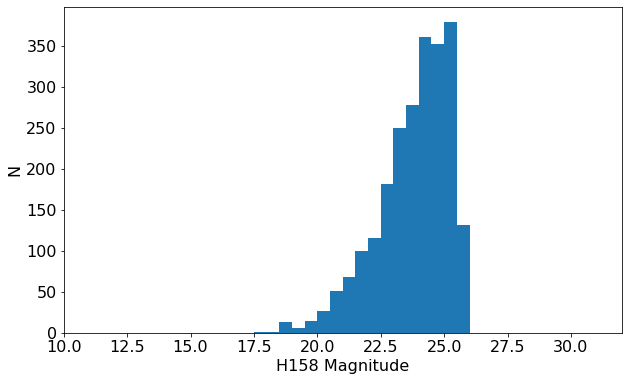

In [7]:
#check_all_phot(root = "sim_v3", prefix="field", mag_key="MAG_AUTO", verb=0)
check_roll_phot(root = "hlss", cat = "hlss_phot.fits", verb=1)
#check_roll_phot(root = "hlss_single", cat = "hlss_phot.fits", verb=1)

In [8]:
#check_all_redshift_fits(root = "sim_v3")
check_roll_redshift_fits(root = "hlss", LOCAL_PATH="/home/gwalth/data/Roman/grizli/sims")
#check_roll_redshift_fits(root = "hlss_single", prefix="hlss", LOCAL_PATH="/home/gwalth/data/Roman/grizli/sims")

HOME_PATH =  /home/gwalth/data/Roman/grizli/sims
LOCAL_PATH =  /home/gwalth/data/Roman/grizli/sims
cygnusd
Find ids of all the extracted objects
N = 1820
Load redshift FITS files
['ID', 'RA', 'DEC', 'REDSHIFT', 'NUMLINES', 'LINE001', 'FLUX001', 'ERR001', 'LINE002', 'FLUX002', 'ERR002', 'LINE003', 'FLUX003', 'ERR003', 'LINE004', 'FLUX004', 'ERR004', 'LINE005', 'FLUX005', 'ERR005', 'CHIMIN', 'DOF', 'Z02', 'Z16', 'Z50', 'Z84', 'Z97', 'ZWIDTH1', 'ZWIDTH2', 'Z_RISK', 'MIN_RISK', 'Z_MAP', 'GAM_LOSS']
Time to load FITS files and create Table 111.1 seconds



Time to process all rolls for a single field is 121 seconds

HOME_PATH =  /home/gwalth/data/Roman/grizli/sims
LOCAL_PATH =  /home/gwalth/data/Roman/grizli/sims
cygnusd
['Euclid_Roman_4deg2_roll_170.0.fits', 'Euclid_Roman_4deg2_roll_5.0.fits', 'Euclid_Roman_4deg2_roll_0.0.fits', 'Euclid_Roman_4deg2_roll_175.0.fits']
Euclid_Roman_4deg2_roll_170.0.fits
13260
['num', 'RA', 'DEC', 'x_pix', 'y_pix', 'a_pix', 'b_pix', 'PA', 'm', 'm_new', 'z_true', 'z_axe', 'sim_num', 'spec_num', 'spec_file', 'spectemp', 'modimage', 'flux_Ha', 'flux_OIII']

Euclid_Roman_4deg2_roll_5.0.fits
13260
['num', 'RA', 'DEC', 'x_pix', 'y_pix', 'a_pix', 'b_pix', 'PA', 'm', 'm_new', 'z_true', 'z_axe', 'sim_num', 'spec_num', 'spec_file', 'spectemp', 'modimage', 'flux_Ha', 'flux_OIII']

Euclid_Roman_4deg2_roll_0.0.fits
13260
['num', 'RA', 'DEC', 'x_pix', 'y_pix', 'a_pix', 'b_pix', 'PA', 'm', 'm_new', 'z_true', 'z_axe', 'sim_num', 'spec_num', 'spec_file', 'spectemp', 'modimage', 'flux_Ha', 'flux_OIII']

Euclid_Roman_4deg2_roll_175.0.fits
13260
['num', 'RA', 'DEC', 'x_pix', 'y_pix', 'a

2022-11-06 18:30:37,646 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59801.000000 from DATE-OBS'.
  warnings.warn(

2022-11-06 18:30:37,655 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59801.000000 from DATE-OBS'.
  warnings.warn(





Load hlss-000.0-gr.01.GrismFLT.fits!


2022-11-06 18:30:55,165 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59801.000000 from DATE-OBS'.
  warnings.warn(

2022-11-06 18:30:55,173 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59801.000000 from DATE-OBS'.
  warnings.warn(



Load hlss-005.0-gr.01.GrismFLT.fits!


2022-11-06 18:31:05,146 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59801.000000 from DATE-OBS'.
  warnings.warn(

2022-11-06 18:31:05,153 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59801.000000 from DATE-OBS'.
  warnings.warn(



Load hlss-170.0-gr.01.GrismFLT.fits!


2022-11-06 18:31:14,356 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59801.000000 from DATE-OBS'.
  warnings.warn(

2022-11-06 18:31:14,363 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59801.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 46.64 sec.
Time to load FLTs 46.8 seconds
Number of FLTs:
4
ids =
[1, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 42, 44, 45, 46, 47, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68, 69, 71, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 89, 90, 91, 92, 94, 95, 96, 97, 99, 100, 102, 103, 105, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 206, 207, 208, 209, 210, 211, 215, 216, 217, 219, 220, 221, 222, 223, 224, 226, 227, 228, 229, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 24

 ID         RA                DEC         ...       Z_MAP        GAM_LOSS
--- ----------------- ------------------- ... ------------------ --------
  1 9.152271440681512 -0.8749050431642904 ...   3.70322515979682     0.15
  4 9.219294409625812 -0.8748200995321165 ...  1.066386957468094     0.15
  5 9.211643216616034  -0.874864149706043 ...  1.810551565901895     0.15
  6 9.218404288564974 -0.8747752490623356 ...  1.114196594789768     0.15
  8 9.232500349275494 -0.8743487306113703 ...  3.920119866290023     0.15
  9 9.190136476176388 -0.8743775831315309 ...  3.448879210944006     0.15
 10 9.203320267769897 -0.8743795441512142 ...  0.725063772492022     0.15
 12 9.180220171502517  -0.874027221901672 ...   4.83865236473846     0.15
 13 9.199553067408877 -0.8740095828058281 ... 0.5178630807749285     0.15
 14 9.131709713287457 -0.8739209741011379 ...  3.856799637461567     0.15
 id        thresh        npix ... flag_aper_6      bkg_aper_6      mask_aper_6
                              ...

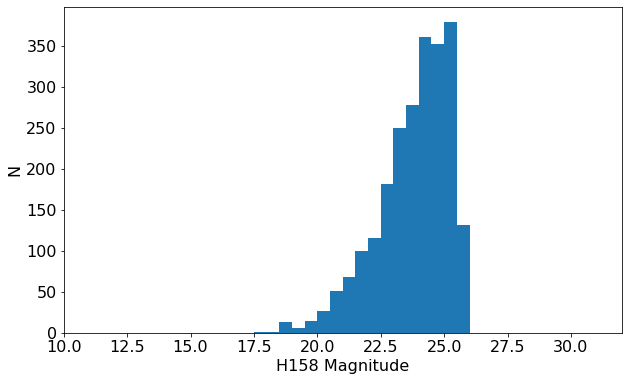

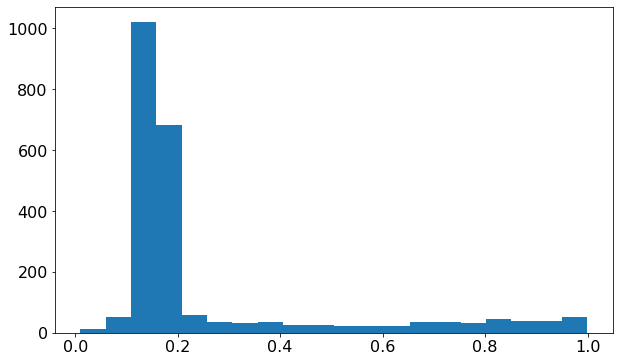

In [9]:
#all_match_tbl,all_match_clean_tbl = build_all_tables(verb=1)
all_match_tbl,all_match_clean_tbl = build_roll_tables(root="hlss", verb=1,
                                                      LOCAL_PATH="/home/gwalth/data/Roman/grizli/sims")                                                      
#all_match_tbl,all_match_clean_tbl = build_roll_tables(root="hlss_single", prefix="hlss", verb=1,
#                                                      LOCAL_PATH="/home/gwalth/data/Roman/grizli/sims")

In [10]:
print(type(all_match_tbl))
print(type(all_match_clean_tbl))

<class 'astropy.table.table.Table'>
<class 'astropy.table.table.Table'>


In [ ]:
#all_match_tbl = vstack(all_match_tables)
#all_match_clean_tbl = vstack(all_match_clean_tables)

In [ ]:
#print(os.getcwd())
#os.chdir(os.path.join(LOCAL_PATH, root, 'Extractions'))
#print(os.getcwd())

### Write tables

In [11]:
all_match_tbl.write("hlss_match.fits")
all_match_clean_tbl.write("hlss_match_clean.fits")

2022-11-06 18:31:41,811 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'FILTER_TYPE' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  warnings.warn(

2022-11-06 18:31:41,812 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'THRESHOLD' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  warnings.warn(

2022-11-06 18:31:41,815 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'BACK_PIXEL_SCALE' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  warnings.warn(

2022-11-06 18:31:41

### Load tables

In [8]:
print(os.getcwd())

/Users/gwalth/data/Roman/grizli/notebooks


In [9]:
os.chdir(os.path.join(LOCAL_PATH, root, 'Extractions'))

In [10]:
print(os.getcwd())

/Users/gwalth/data/Roman/grizli/sims/hlss/Extractions


In [11]:
#from astropy.table import Table
all_match_tbl = Table.read("hlss_match.fits")
all_match_clean_tbl = Table.read("hlss_match_clean.fits")

In [12]:
print(all_match_tbl)

 id         thresh       npix ...       flux_OIII                 d2d          
                              ...                                 deg          
---- ------------------- ---- ... ---------------------- ----------------------
   1 0.06178424134850502   28 ...  6.662355359759971e-20  0.0006737594520194983
   1 0.06178424134850502   28 ...  3.638469748694988e-20  0.0012059853233865278
   1 0.06178424134850502   28 ...   9.45396479391326e-19 3.7509966367886886e-05
   1 0.06178424134850502   28 ... 2.7205181116182355e-22   0.002528492749341889
   1 0.06178424134850502   28 ...  3.202972457097668e-20   0.002511123342405073
   1 0.06178424134850502   28 ... 4.9119672399798644e-20  0.0019143377320838815
 ...                 ...  ... ...                    ...                    ...
2331                 0.0  904 ...  4.765897013410843e-19  0.0007198967199675086
2331                 0.0  904 ...  4.028002511426696e-18  0.0026134779798244545
2331                 0.0  904 ... 3.1467

In [13]:
print(all_match_tbl['FLUX001'])

      FLUX001       
--------------------
2.91731367097729e-17
2.91731367097729e-17
2.91731367097729e-17
2.91731367097729e-17
2.91731367097729e-17
2.91731367097729e-17
2.91731367097729e-17
                 ...
3.35127852797203e-16
3.35127852797203e-16
3.35127852797203e-16
3.35127852797203e-16
3.35127852797203e-16
3.35127852797203e-16
3.35127852797203e-16
Length = 13260 rows


In [14]:
print(all_match_clean_tbl)

 id         thresh        ...       flux_OIII                 d2d          
                          ...                                 deg          
---- -------------------- ... ---------------------- ----------------------
   1  0.06178424134850502 ...   9.45396479391326e-19 3.7509966367886886e-05
   4  0.06123847886919975 ...  5.679408138647068e-18 4.2865791739233816e-05
   4  0.06123847886919975 ... 1.1230708914545274e-17  4.475615240955337e-05
   5 0.061523228883743286 ... 2.4978527164519793e-17  9.741130333695356e-05
   6  0.06175384297966957 ...  7.039005208527849e-17  4.256063000261097e-05
   8  0.06114180386066437 ...  7.752926631284578e-18  4.582134116211439e-05
 ...                  ... ...                    ...                    ...
2320 0.061444010585546494 ...  6.161021372806797e-21  4.211341599951186e-05
2322  0.06136530637741089 ...  6.841897209721084e-20  4.356364545823473e-05
2323  0.06181471794843674 ... 2.6602272411474608e-18  4.581841403095215e-05
2324  0.0613

In [15]:
print(all_match_tbl.colnames)
print(len(all_match_tbl.colnames))

['id', 'thresh', 'npix', 'tnpix', 'xmin', 'xmax', 'ymin', 'ymax', 'x', 'y', 'x2_image', 'y2_image', 'xy_image', 'errx2', 'erry2', 'errxy', 'a_image', 'b_image', 'theta_image', 'cxx_image', 'cyy_image', 'cxy_image', 'cflux', 'flux', 'cpeak', 'peak', 'xcpeak', 'ycpeak', 'xpeak', 'ypeak', 'flag', 'x_image', 'y_image', 'number', 'ra', 'dec', 'x_world', 'y_world', 'flux_iso', 'fluxerr_iso', 'area_iso', 'mag_iso', 'kron_radius', 'kron_rcirc', 'flux_auto', 'fluxerr_auto', 'bkg_auto', 'flag_auto', 'area_auto', 'flux_radius_flag', 'flux_radius_20', 'flux_radius', 'flux_radius_90', 'tot_corr', 'mag_auto', 'magerr_auto', 'flux_aper_0', 'fluxerr_aper_0', 'flag_aper_0', 'bkg_aper_0', 'mask_aper_0', 'flux_aper_1', 'fluxerr_aper_1', 'flag_aper_1', 'bkg_aper_1', 'mask_aper_1', 'flux_aper_2', 'fluxerr_aper_2', 'flag_aper_2', 'bkg_aper_2', 'mask_aper_2', 'flux_aper_3', 'fluxerr_aper_3', 'flag_aper_3', 'bkg_aper_3', 'mask_aper_3', 'flux_aper_4', 'fluxerr_aper_4', 'flag_aper_4', 'bkg_aper_4', 'mask_aper_4

In [16]:
print(all_match_clean_tbl.colnames)
print(len(all_match_clean_tbl.colnames))

['id', 'thresh', 'npix', 'tnpix', 'xmin', 'xmax', 'ymin', 'ymax', 'x', 'y', 'x2_image', 'y2_image', 'xy_image', 'errx2', 'erry2', 'errxy', 'a_image', 'b_image', 'theta_image', 'cxx_image', 'cyy_image', 'cxy_image', 'cflux', 'flux', 'cpeak', 'peak', 'xcpeak', 'ycpeak', 'xpeak', 'ypeak', 'flag', 'x_image', 'y_image', 'number', 'ra', 'dec', 'x_world', 'y_world', 'flux_iso', 'fluxerr_iso', 'area_iso', 'mag_iso', 'kron_radius', 'kron_rcirc', 'flux_auto', 'fluxerr_auto', 'bkg_auto', 'flag_auto', 'area_auto', 'flux_radius_flag', 'flux_radius_20', 'flux_radius', 'flux_radius_90', 'tot_corr', 'mag_auto', 'magerr_auto', 'flux_aper_0', 'fluxerr_aper_0', 'flag_aper_0', 'bkg_aper_0', 'mask_aper_0', 'flux_aper_1', 'fluxerr_aper_1', 'flag_aper_1', 'bkg_aper_1', 'mask_aper_1', 'flux_aper_2', 'fluxerr_aper_2', 'flag_aper_2', 'bkg_aper_2', 'mask_aper_2', 'flux_aper_3', 'fluxerr_aper_3', 'flag_aper_3', 'bkg_aper_3', 'mask_aper_3', 'flux_aper_4', 'fluxerr_aper_4', 'flag_aper_4', 'bkg_aper_4', 'mask_aper_4

### Description of tables

The available tables for analysis:

| Tables      | Description |
| :--- | :--- |
| phot          | SExtractor table |
| Roman         | Grizli data |
| Roman_all     | output of check_sims, all sources |
| Roman_magcut  | output of check_sims, only sources above the magnitude cut |
| Roman_extract | output of check_sims, only sources extracted |
| redshift_fits | all the redshift fits of the Roman_extract (full.fits) read into a table |
| primer        | original input sources and true redshifts |


Roman_extract, redshift_fits and primer need to be joined into one table

Roman_extract and redshift_fits can be joined based on SExtractor id --> all_tbl
primer needs to be joined based on RA,Dec  

| Tables      | Description |
| :--- | :--- |
| all_tbl         | join between Roman_extract and redshift_fits |
| match_tbl       | join between all_tbl and primer |
| match_clean_tbl | sources outside of search radius removed (>0.4") |

1927
541
355


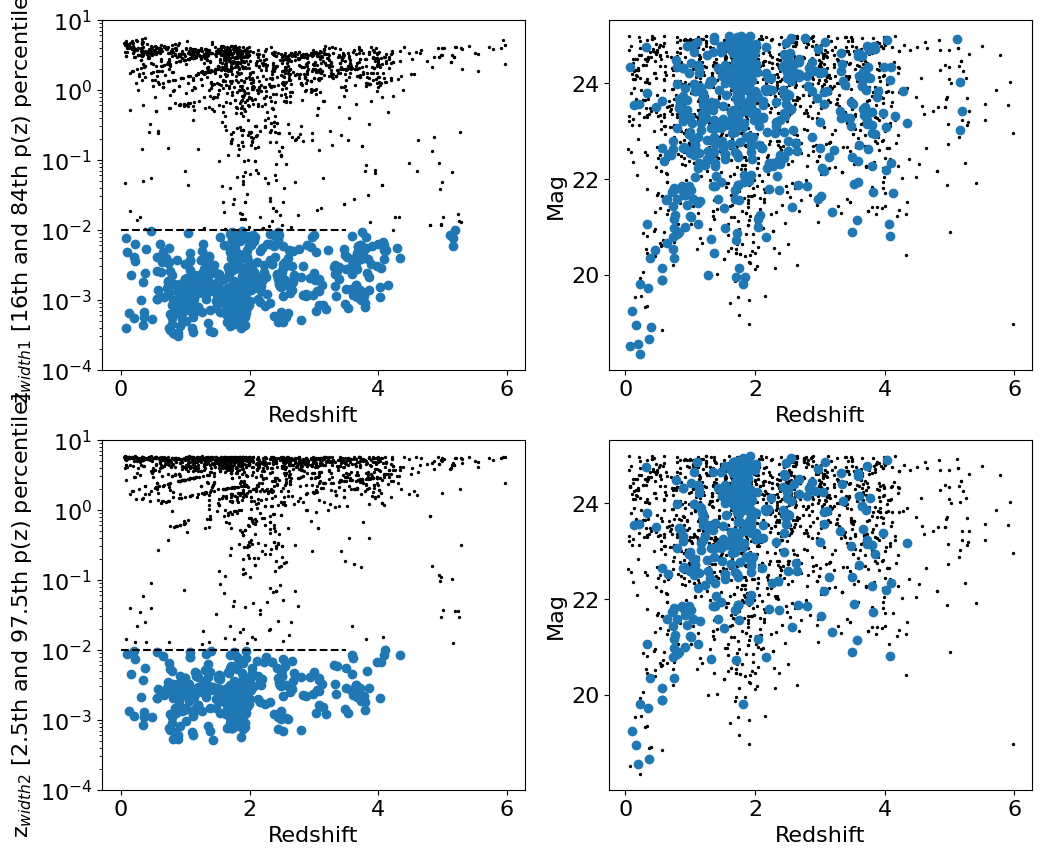

In [17]:
#plot_redshifts(all_tbl)
zfilt1,zfilt2 = plot_redshifts2(all_match_clean_tbl)

In [18]:
#z_fit = all_match_clean_tbl["REDSHIFT_1"]
#z_true = all_match_clean_tbl["REDSHIFT_2"]
z_fit = all_match_clean_tbl["REDSHIFT"]
z_true = all_match_clean_tbl["z_true"]

mag_fit  = all_match_clean_tbl["mag_auto"]
#mag_true = all_match_clean_tbl["MAG_F1600W"]
#mag_true = all_match_clean_tbl["m"]
mag_true = all_match_clean_tbl["m_new"]

filt = all_match_clean_tbl["mag_auto"] < 24

Text(0.5, 0, 'Magnitude')

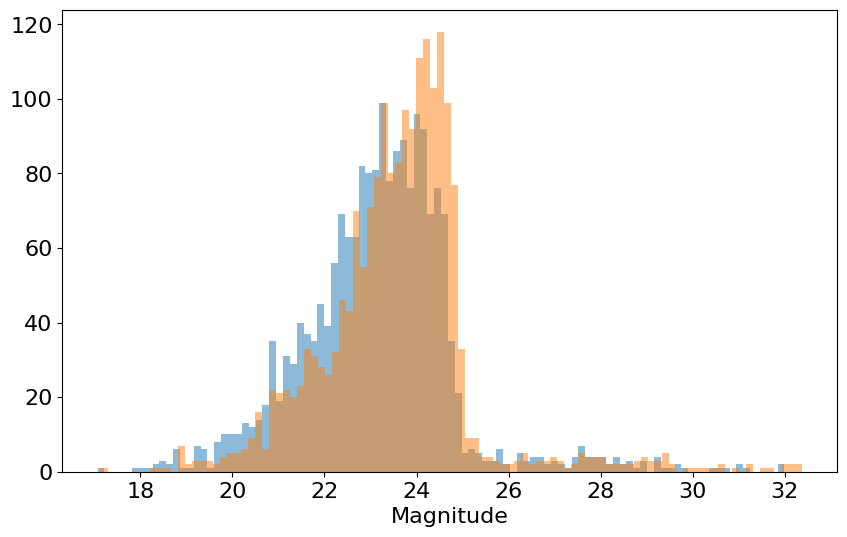

In [19]:
fig = plt.figure()
p1 = fig.add_subplot(111)
p1.hist(all_match_clean_tbl["m"],bins=100, alpha=0.5)
p1.hist(all_match_clean_tbl["m_new"],bins=100, alpha=0.5)
p1.set_xlabel("Magnitude")

Text(0.5, 0, 'True redshift')

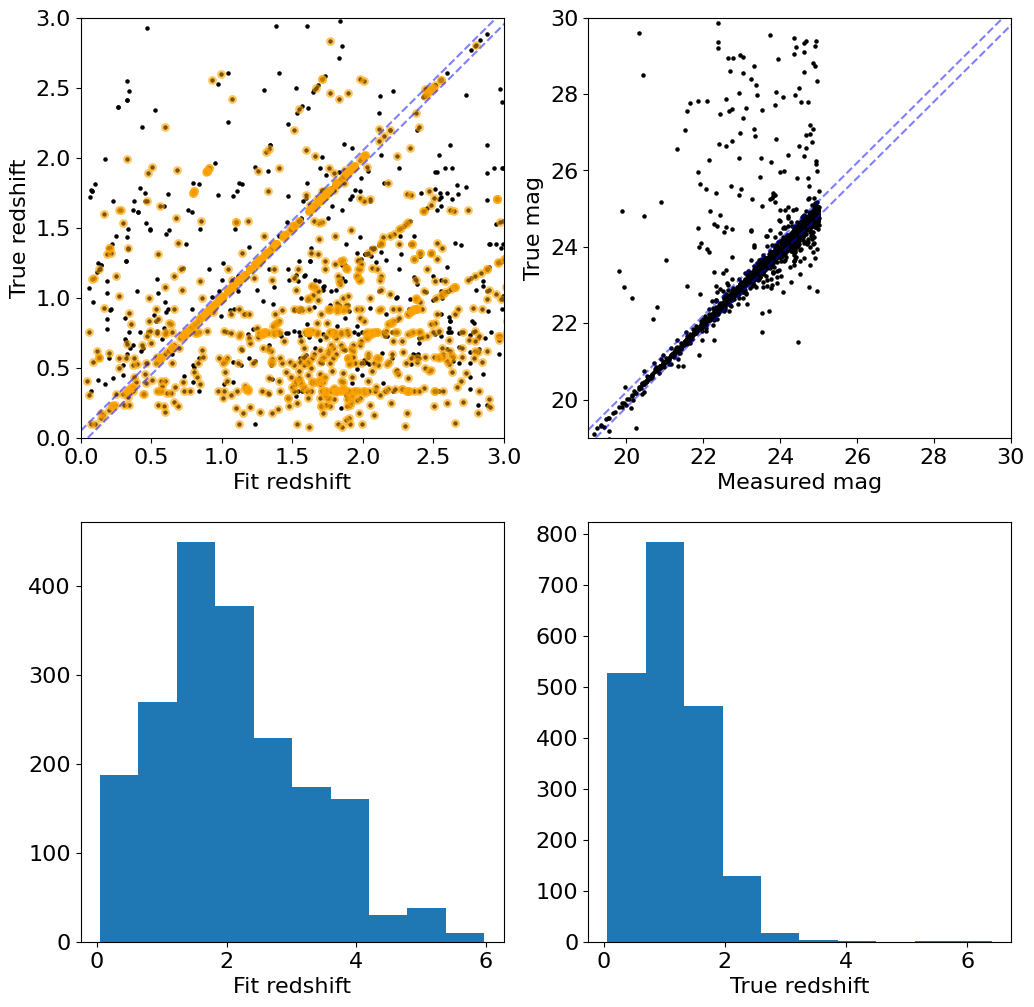

In [20]:
fig = plt.figure(figsize=(12,12))

p1 = fig.add_subplot(221)
p1.scatter(z_fit, z_true, s=5, c="k")
p1.scatter(z_fit[filt], z_true[filt], s=30, c="orange",alpha=0.5)
p1.plot([0.05,3.05],[0.0,3.0],"--",c="b",alpha=0.5)
p1.plot([0.0,3.0],[0.05,3.05],"--",c="b",alpha=0.5)
p1.set_xlim(0,3)
p1.set_ylim(0,3)
p1.set_xlabel("Fit redshift")
p1.set_ylabel("True redshift")

p2 = fig.add_subplot(222)
p2.scatter(mag_fit, mag_true, s=5, c="k")
p2.plot([19.2,30.2],[19,30],"--",c="b",alpha=0.5)
p2.plot([19,30],[19.2,30.2],"--",c="b",alpha=0.5)
p2.set_xlim(19,30)
p2.set_ylim(19,30)
p2.set_xlabel("Measured mag")
p2.set_ylabel("True mag")

p3 = fig.add_subplot(223)
p3.hist(z_fit)
p3.set_xlabel("Fit redshift")

p4 = fig.add_subplot(224)
p4.hist(z_true)
p4.set_xlabel("True redshift")

Text(0.5, 0, 'True redshift')

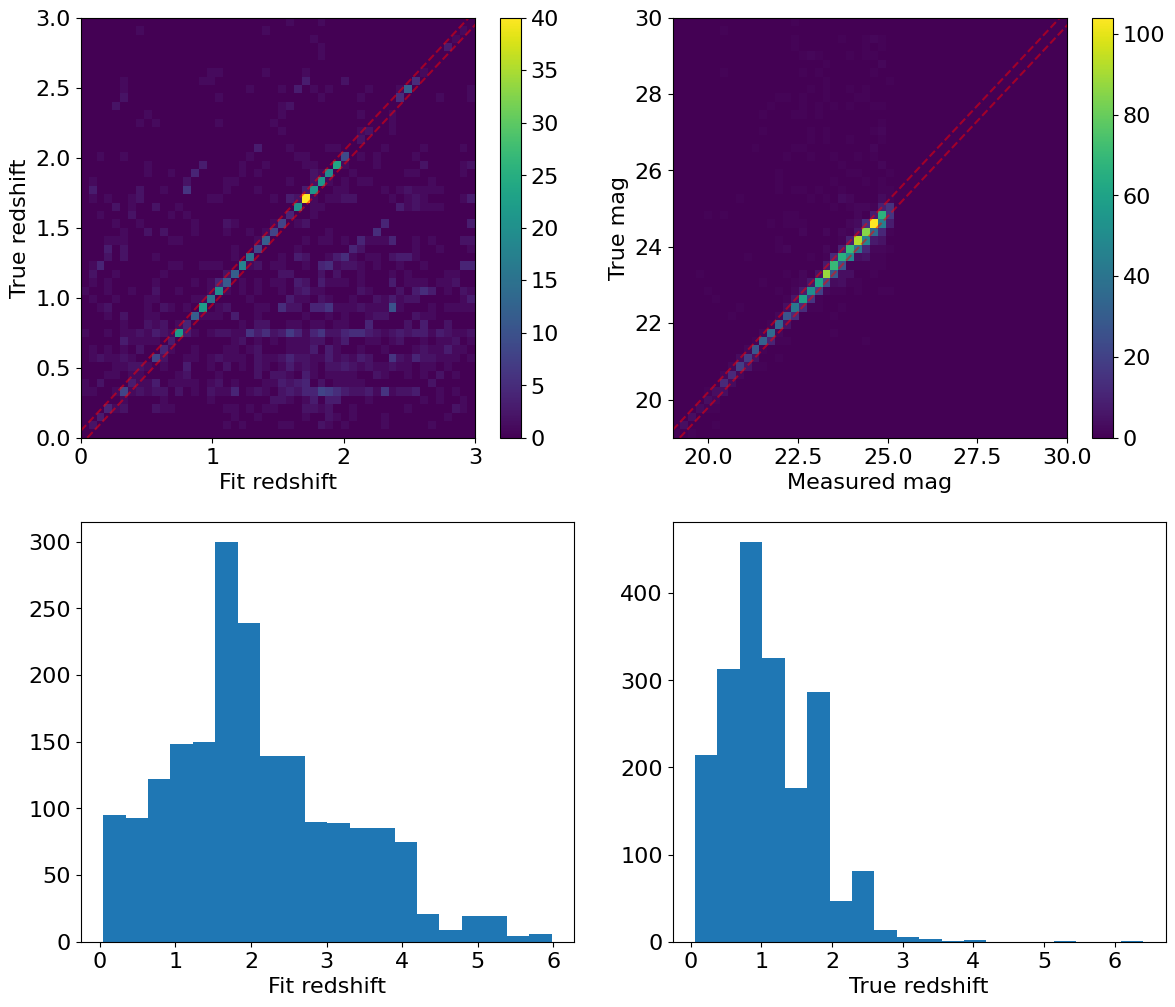

In [21]:
fig = plt.figure(figsize=(14,12))

p1 = fig.add_subplot(221)
#p1.scatter(z_fit, z_true, s=5, c="k")
#p1.scatter(z_fit[filt], z_true[filt], s=30, c="orange",alpha=0.5)
#im1 = p1.hist2d(z_fit,z_true,bins=(60,60))
im1 = p1.hist2d(z_fit, z_true, range=[[0,3],[0,3]], bins=(50,50))
p1.plot([0.05,3.05],[0.0,3.0],"--",c="r",alpha=0.5)
p1.plot([0.0,3.0],[0.05,3.05],"--",c="r",alpha=0.5)
#p1.set_xlim(0,3)
#p1.set_ylim(0,3)
p1.set_xlabel("Fit redshift")
p1.set_ylabel("True redshift")

cb1 = fig.colorbar(im1[3])

p2 = fig.add_subplot(222)
#p2.scatter(mag_fit, mag_true, s=5, c="k")
#im2 = p2.hist2d(mag_fit, mag_true, bins=(55,55))
im2 = p2.hist2d(mag_fit, mag_true, range=[[19,30],[19,30]], bins=(50,50))
p2.plot([19.2,30.2],[19,30],"--",c="r",alpha=0.5)
p2.plot([19,30],[19.2,30.2],"--",c="r",alpha=0.5)
#p2.set_xlim(19,30)
#p2.set_ylim(19,30)
p2.set_xlabel("Measured mag")
p2.set_ylabel("True mag")

cb2 = fig.colorbar(im2[3])

p3 = fig.add_subplot(223)
p3.hist(z_fit,bins=20)
p3.set_xlabel("Fit redshift")

p4 = fig.add_subplot(224)
p4.hist(z_true,bins=20)
p4.set_xlabel("True redshift")

Text(0.5, 0, 'dz')

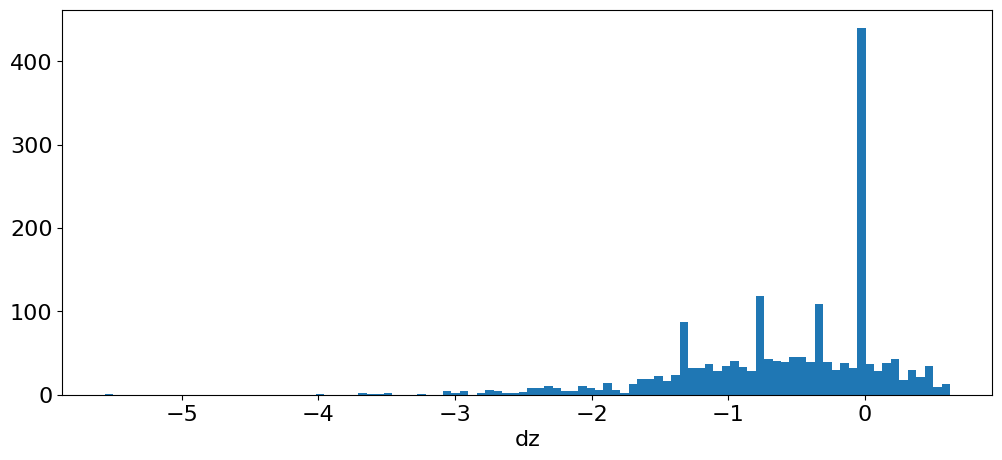

In [22]:
dz = (z_true - z_fit)/(1+z_true)

fig = plt.figure(figsize=(12,5))

p1 = fig.add_subplot(111)
p1.hist(dz,bins=100)

#p1.hist(dz,bins=1000)
#p1.set_xlim(-0.02,0.02)

p1.set_xlabel("dz")

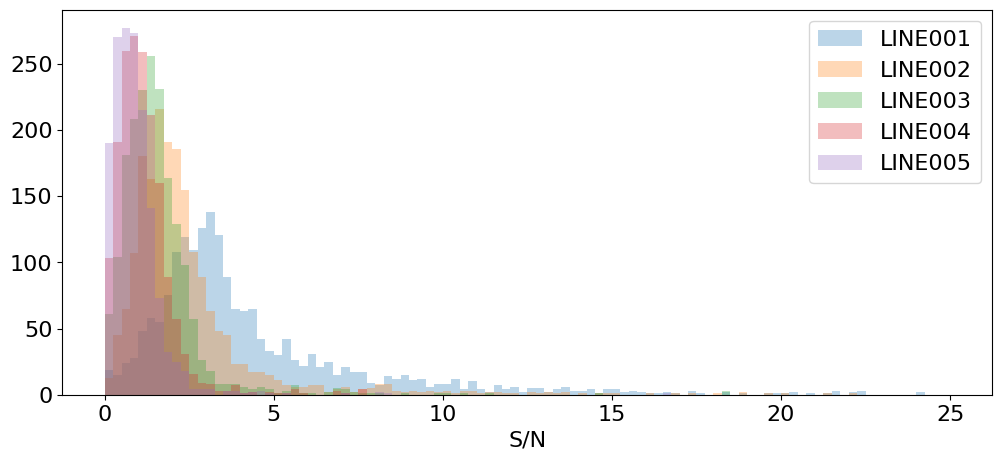

In [23]:
all_match_clean_tbl['SN001'] = all_match_clean_tbl['FLUX001']/all_match_clean_tbl['ERR001']
all_match_clean_tbl['SN002'] = all_match_clean_tbl['FLUX002']/all_match_clean_tbl['ERR002']
all_match_clean_tbl['SN003'] = all_match_clean_tbl['FLUX003']/all_match_clean_tbl['ERR003']
all_match_clean_tbl['SN004'] = all_match_clean_tbl['FLUX004']/all_match_clean_tbl['ERR004']
all_match_clean_tbl['SN005'] = all_match_clean_tbl['FLUX005']/all_match_clean_tbl['ERR005']

fig = plt.figure(figsize=(12,5))
p1 = fig.add_subplot(111)
p1.hist(all_match_clean_tbl['SN001'],bins=100,range=[0,25],label="LINE001",alpha=0.3)
p1.hist(all_match_clean_tbl['SN002'],bins=100,range=[0,25],label="LINE002",alpha=0.3)
p1.hist(all_match_clean_tbl['SN003'],bins=100,range=[0,25],label="LINE003",alpha=0.3)
p1.hist(all_match_clean_tbl['SN004'],bins=100,range=[0,25],label="LINE004",alpha=0.3)
p1.hist(all_match_clean_tbl['SN005'],bins=100,range=[0,25],label="LINE005",alpha=0.3)
p1.set_xlabel("S/N")
#p1.set_xlim(0,25)
p1.legend()

In [24]:
filt1 = all_match_clean_tbl['SN001'] > 6.5
print("Num. sources (S/N > 6.5) =",len(all_match_clean_tbl['SN001'][filt1]))

all_match_clean_sn65_tbl = all_match_clean_tbl[filt1]
print("Num. sources w/ 2 lines (S/N > 3)")
filt2 = all_match_clean_sn65_tbl['SN002'] > 3
print(len(all_match_clean_sn65_tbl[filt2]))

print("Num. sources w/ 3 lines (S/N > 3)")
filt3 = all_match_clean_sn65_tbl['SN003'] > 3
print(len(all_match_clean_sn65_tbl[filt3]))



Num. sources (S/N > 6.5) = 355
Num. sources w/ 2 lines (S/N > 3)
171
Num. sources w/ 3 lines (S/N > 3)
67


Num. sources = 1927
Num. sources (S/N > 6.5) = 355
Num. sources (dz < 0.005) = 189
Frac. sources (dz < 0.005) = 0.5324



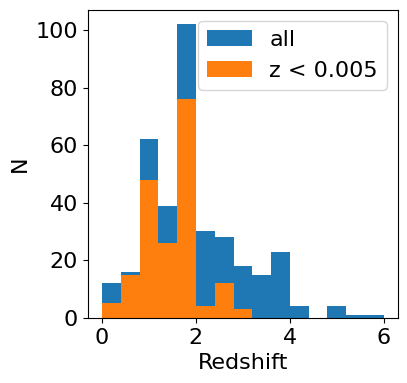

Num. sources = 1927
Num. sources (S/N > 5.0) = 527
Num. sources (dz < 0.005) = 263
Frac. sources (dz < 0.005) = 0.4991



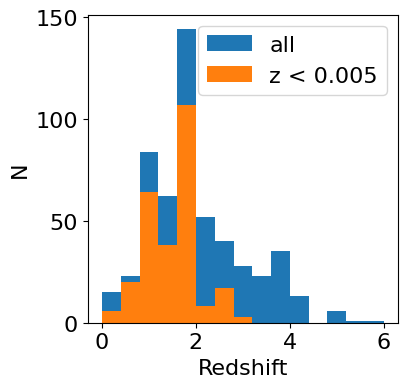

Num. sources = 1927
Num. sources (S/N > 3.0) = 1143
Num. sources (dz < 0.005) = 377
Frac. sources (dz < 0.005) = 0.3298



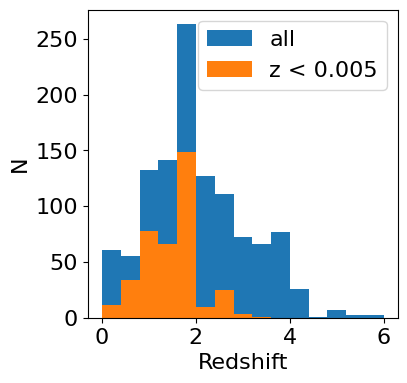

(<Table length=1143>
   id         thresh         npix ...        SN004               SN005       
                                  ...                                        
 int64       float64        int64 ...       float64             float64      
 ----- -------------------- ----- ... ------------------- -------------------
     4  0.06123847886919975    51 ...  1.3901971434859672  1.0225061907416129
     4  0.06123847886919975    51 ...  1.3901971434859672  1.0225061907416129
     5 0.061523228883743286   155 ...   1.544984927371233  1.3172755529334754
     6  0.06175384297966957   114 ...  1.8171534845754942  0.6547034282820968
    14  0.06178424134850502    27 ...                -1.0                -1.0
    15   0.0612773559987545    18 ...  1.6570744142515457    1.69472497072978
   ...                  ...   ... ...                 ...                 ...
  2313  0.06176396459341049    58 ...   2.146067353696662  1.3847071199455323
  2315 0.061804551631212234    46 ...  0.98

In [25]:
sample_info = sample_numbers(all_match_clean_tbl, sn_key='SN001', sn=6.5, sigma_dz=0.005)
all_match_clean_sn65_tbl, all_match_clean_sn65_dz005_tbl, all_sn65_filt, all_sn65_dz005_filt = sample_info


sample_numbers(all_match_clean_tbl, sn_key='SN001', sn=5.0, sigma_dz=0.005)
sample_numbers(all_match_clean_tbl, sn_key='SN001', sn=3.0, sigma_dz=0.005)

Num. sources = 1927
Num. sources (S/N > 6.5) = 355
Num. sources (dz < 0.005) = 189
Frac. sources (dz < 0.005) = 0.5324



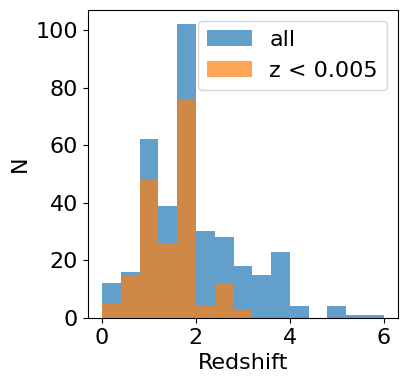

Num. sources = 355
Num. sources (S/N > 3.0) = 171
Num. sources (dz < 0.005) = 134
Frac. sources (dz < 0.005) = 0.7836



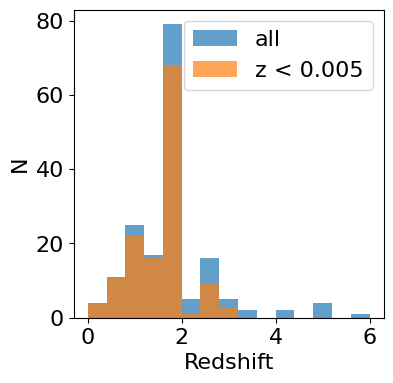

In [26]:
sample_info1 = sample_numbers(all_match_clean_tbl, sn_key='SN001', sn=6.5, sigma_dz=0.005, alpha=0.7)
                              #zmin=0.0,zmax=3.0)
all_match_clean_sn65_tbl, all_match_clean_sn65_dz005_tbl, all_sn65_filt, all_sn65_dz005_filt = sample_info1

sample_info2 = sample_numbers(all_match_clean_sn65_tbl, sn_key='SN002', sn=3.0, sigma_dz=0.005, alpha=0.7)
                              #zmin=0.0,zmax=3.0)
all_match_clean_sn65_sn3_tbl, all_match_clean_sn65_sn3_dz005_tbl, all_sn65_sn3_filt, all_sn65_sn3_dz005_filt = sample_info2

#sample_numbers(all_match_clean_tbl, sn_key='SN001', sn=5.0, sigma_dz=0.005)
#sample_numbers(all_match_clean_tbl, sn_key='SN001', sn=3.0, sigma_dz=0.005)

In [27]:
print(len(all_match_clean_sn65_tbl))
print(len(all_match_clean_sn65_dz005_tbl))
print(all_sn65_filt.shape)
print(all_sn65_dz005_filt.shape)

all_sn65_dz005_not_filt = np.logical_not(all_sn65_dz005_filt)
all_match_clean_sn65_dz005_not_tbl = all_match_clean_sn65_tbl[all_sn65_dz005_not_filt]

355
189
(1927,)
(355,)


Num. sources = 1927
Num. sources (S/N > 6.5) = 355
Num. sources (dz < 0.005) = 189
Frac. sources (dz < 0.005) = 0.5324

30
[ 1  2  2  7  0  2  1 13 10 18 20 14  7 14  7 11 28 34 24 16  7  8  6  9
 15  6  6  1  7  1]
[ 0  0  0  5  0  2  1 12  8 16 14 10  6  9  4  7 19 28 18 11  2  2  0  0
  8  2  1  1  3  0]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
crap


/Users/gwalth/python.linux/dev/grizli_analysis.py:1411: RuntimeWarning: invalid value encountered in divide
  ax.plot(bin_mid_dz, hist_dz/hist, drawstyle="steps-mid",c="orange")


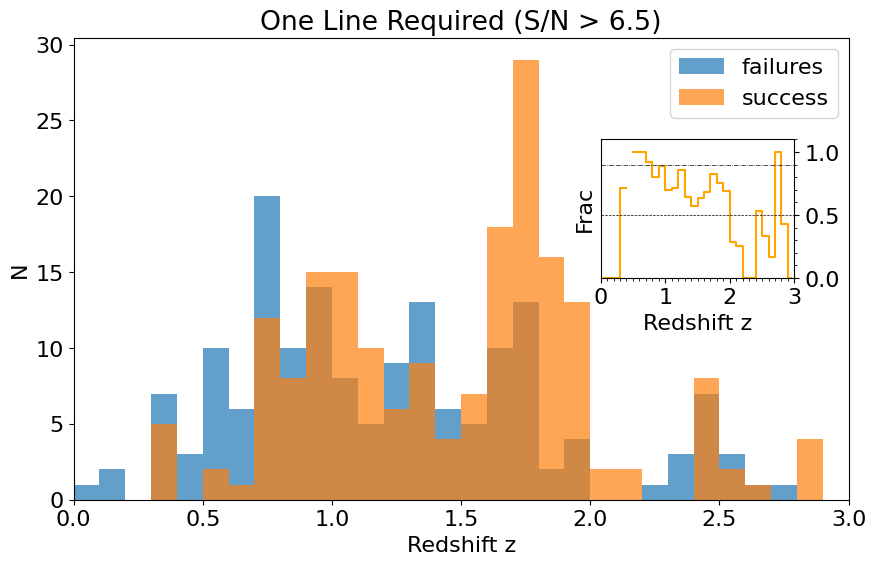

In [28]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure(figsize=(10,6))

p = fig.add_subplot(111)
#p.hist(all_match_clean_sn65_dz005_not_tbl['REDSHIFT_2'],
#       range=(0,3), bins=30, alpha=0.7, label="failures")
#p.hist(all_match_clean_sn65_dz005_tbl['REDSHIFT_2'],
#       range=(0,3), bins=30, alpha=0.7, label="matches")
p.hist(all_match_clean_sn65_dz005_not_tbl['z_true'],
       range=(0,3), bins=30, alpha=0.7, label="failures")
p.hist(all_match_clean_sn65_dz005_tbl['z_true'],
       range=(0,3), bins=30, alpha=0.7, label="success")
#p.legend()

p.set_xlabel("Redshift z")
p.set_ylabel("N")
p.set_xlim(0,3)
p.set_title("One Line Required (S/N > 6.5)")
#p.set_ylim(0,30)
p.legend()

# Create inset in data coordinates using ax.transData as transform
ax_ins = inset_axes(p, width="100%", height="100%",
                    bbox_to_anchor=(0.68, 0.48, 0.25, 0.3),
                    bbox_transform=p.transAxes, borderpad=0)

ax_ins.tick_params(which='both',left=False, right=True, labelleft=False, labelright=True)

sample_info1 = sample_numbers3(all_match_clean_tbl, sn_key='SN001', sn=6.5, sigma_dz=0.005, 
                               alpha=0.7, bin_size=0.1, zmin=0, zmax=3, ax=ax_ins)
                              #zmin=0.0,zmax=3.0)
    
print("crap")
all_match_clean_sn65_tbl, all_match_clean_sn65_dz005_tbl, all_sn65_filt, all_sn65_dz005_filt = sample_info1

plt.show()

171
134
(355,)
(171,)
Num. sources = 355
Num. sources (S/N > 3.0) = 171
Num. sources (dz < 0.005) = 134
Frac. sources (dz < 0.005) = 0.7836

30
[ 0  0  0  4  0  2  1  8  6  6  8  5  3  6  3  5 19 26 21 13  2  1  1  1
 11  1  3  1  3  1]
[ 0  0  0  4  0  2  1  8  6  6  5  5  3  6  3  4 17 24 17 10  1  0  0  0
  6  1  1  1  3  0]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]


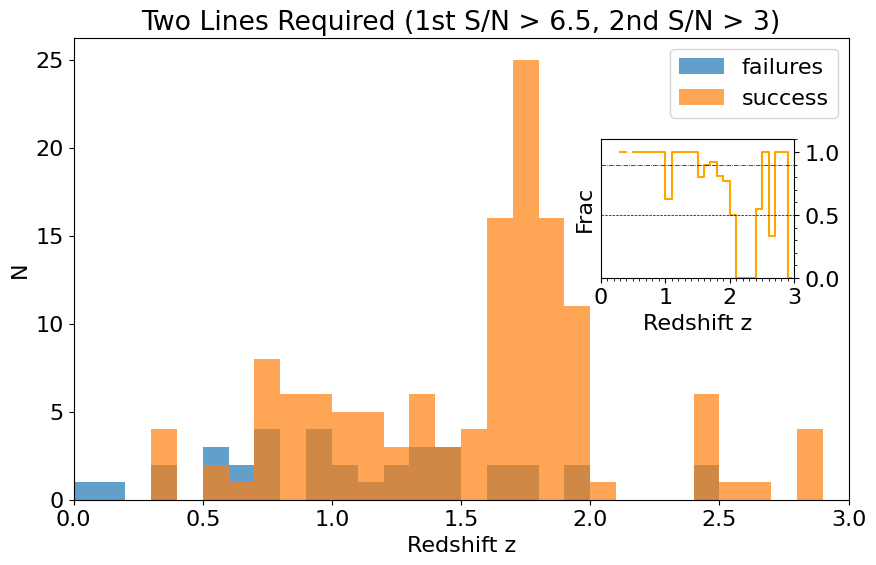

In [29]:
print(len(all_match_clean_sn65_sn3_tbl))
print(len(all_match_clean_sn65_sn3_dz005_tbl))
print(all_sn65_sn3_filt.shape)
print(all_sn65_sn3_dz005_filt.shape)

all_sn65_sn3_dz005_not_filt = np.logical_not(all_sn65_sn3_dz005_filt)
all_match_clean_sn65_sn3_dz005_not_tbl = all_match_clean_sn65_sn3_tbl[all_sn65_sn3_dz005_not_filt]

fig = plt.figure(figsize=(10,6))
p = fig.add_subplot(111)
#p.hist(all_match_clean_sn65_dz005_not_tbl['REDSHIFT_2'],
#       range=(0,3), bins=30, alpha=0.7, label="failures")
#p.hist(all_match_clean_sn65_dz005_tbl['REDSHIFT_2'],
#       range=(0,3), bins=30, alpha=0.7, label="matches")
p.hist(all_match_clean_sn65_sn3_dz005_not_tbl['z_true'],
       range=(0,3), bins=30, alpha=0.7, label="failures")
p.hist(all_match_clean_sn65_sn3_dz005_tbl['z_true'],
       range=(0,3), bins=30, alpha=0.7, label="success")
p.legend()

p.set_xlabel("Redshift z")
p.set_ylabel("N")
p.set_title("Two Lines Required (1st S/N > 6.5, 2nd S/N > 3)")
p.set_xlim(0,3)
#p.set_ylim(0,30)
p.legend()


# Create inset in data coordinates using ax.transData as transform
ax_ins = inset_axes(p, width="100%", height="100%",
                    bbox_to_anchor=(0.68, 0.48, 0.25, 0.3),
                    bbox_transform=p.transAxes, borderpad=0)

ax_ins.tick_params(which='both',left=False, right=True, labelleft=False, labelright=True)

sample_info2 = sample_numbers3(all_match_clean_sn65_tbl, sn_key='SN002', sn=3.0, sigma_dz=0.005, 
                               alpha=0.7, bin_size=0.10, zmin=0, zmax=3, ax=ax_ins)                          
    #zmin=0.0,zmax=3.0)
all_match_clean_sn65_sn3_tbl, all_match_clean_sn65_sn3_dz005_tbl, all_sn65_sn3_filt, all_sn65_sn3_dz005_filt = sample_info2

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Num. sources = 1927
Num. sources (S/N > 6.5) = 355
Num. sources (dz < 0.005) = 189
Frac. sources (dz < 0.005) = 0.5324

12
[ 5  7 10 34 38 24 62 51 19 26 12  9]
[ 0  5  9 30 28 15 45 38  4  8  3  4]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.  ]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.  ]


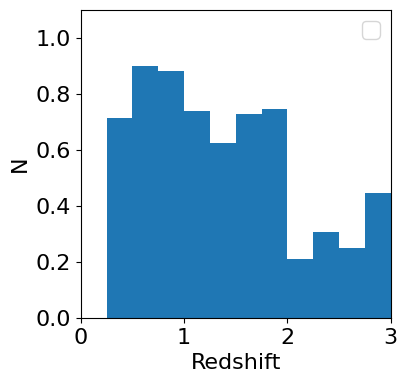

/Users/gwalth/python.linux/dev/grizli_analysis.py:1342: RuntimeWarning: invalid value encountered in divide
  p1.bar(bin_edges_dz[:-1], hist_dz/hist, align="edge", width=bin_size)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Num. sources = 355
Num. sources (S/N > 3.0) = 171
Num. sources (dz < 0.005) = 134
Frac. sources (dz < 0.005) = 0.7836

12
[ 0  4  8 15 15 10 42 42  4 12  4  5]
[ 0  4  8 15 12 10 38 34  1  6  2  4]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.  ]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.  ]


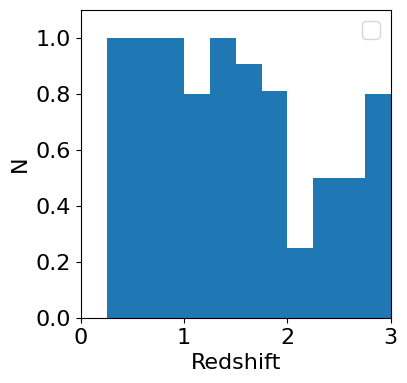

In [30]:
###########
# sample2 #
###########

sample_info1 = sample_numbers2(all_match_clean_tbl, sn_key='SN001', sn=6.5, sigma_dz=0.005, 
                               alpha=0.7, bin_size=0.25, zmin=0, zmax=3)
                              #zmin=0.0,zmax=3.0)
all_match_clean_sn65_tbl, all_match_clean_sn65_dz005_tbl, all_sn65_filt, all_sn65_dz005_filt = sample_info1

sample_info2 = sample_numbers2(all_match_clean_sn65_tbl, sn_key='SN002', sn=3.0, sigma_dz=0.005, 
                               alpha=0.7, bin_size=0.25, zmin=0, zmax=3)                          
    #zmin=0.0,zmax=3.0)
all_match_clean_sn65_sn3_tbl, all_match_clean_sn65_sn3_dz005_tbl, all_sn65_sn3_filt, all_sn65_sn3_dz005_filt = sample_info2

#sample_numbers(all_match_clean_tbl, sn_key='SN001', sn=5.0, sigma_dz=0.005)
#sample_numbers(all_match_clean_tbl, sn_key='SN001', sn=3.0, sigma_dz=0.005)

In [ ]:
(6.0-0.0)/0.1


Text(0.5, 0, 'dz')

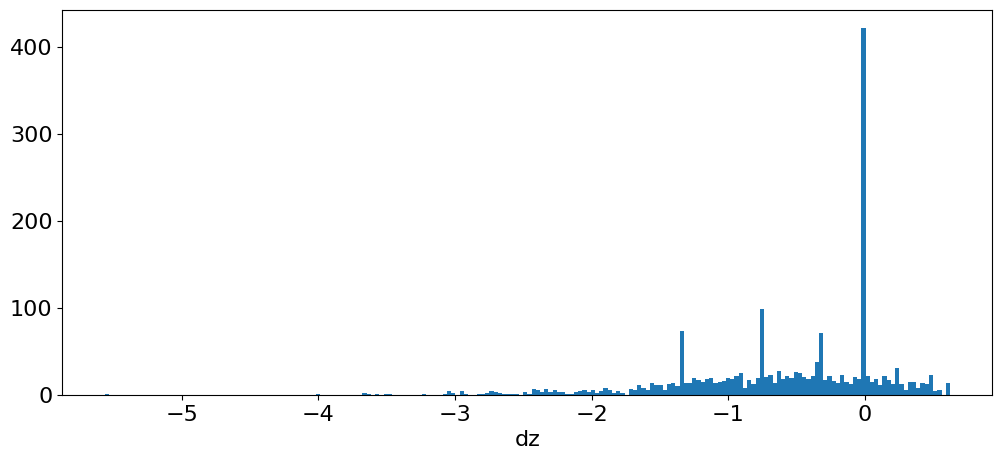

In [31]:
fig = plt.figure(figsize=(12,5))

p1 = fig.add_subplot(111)
#p1.hist(dz,bins=100)

p1.hist(dz,bins=200)
#p1.set_xlim(-0.02,0.02)

p1.set_xlabel("dz")

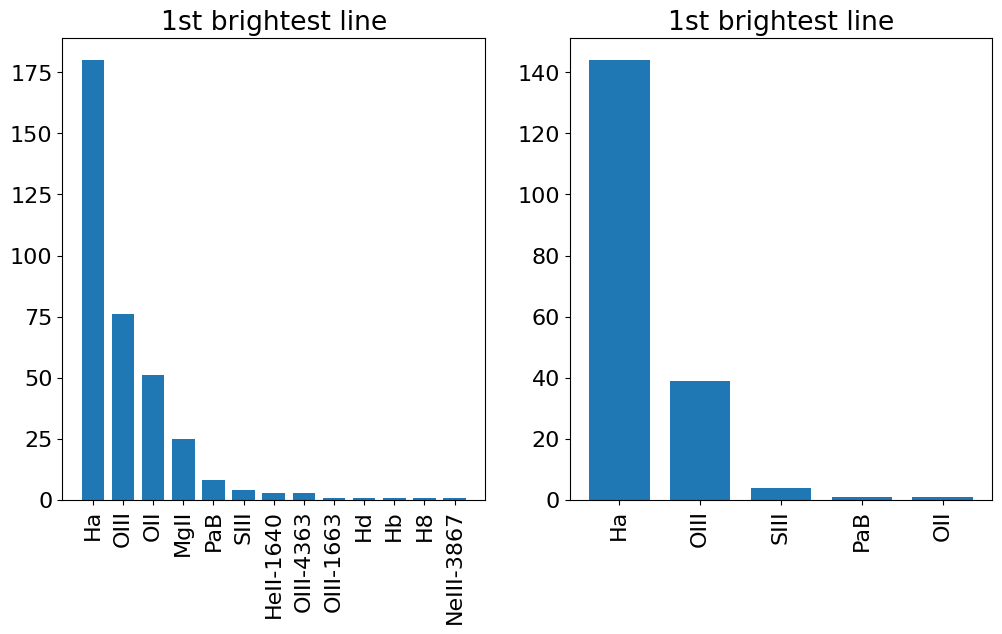

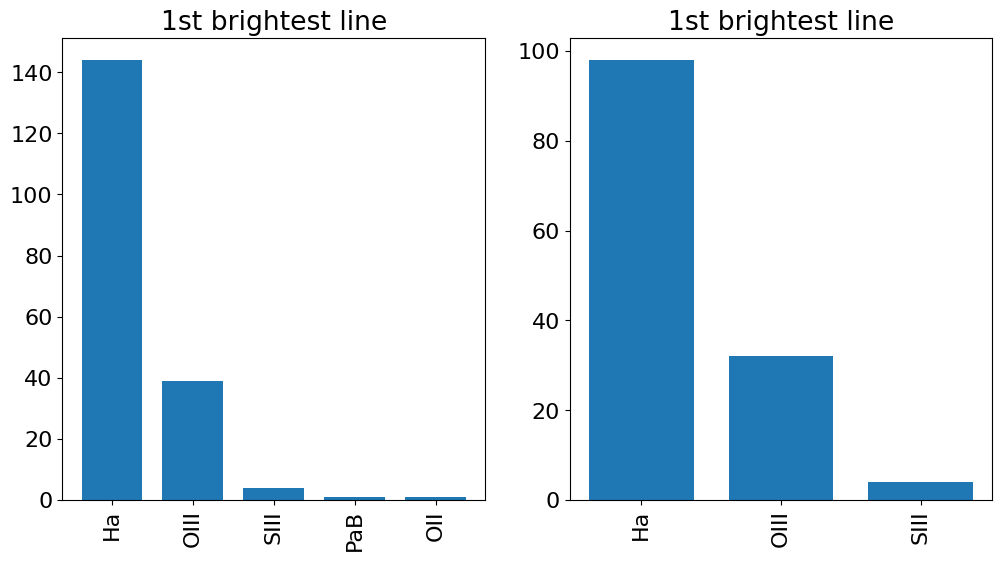

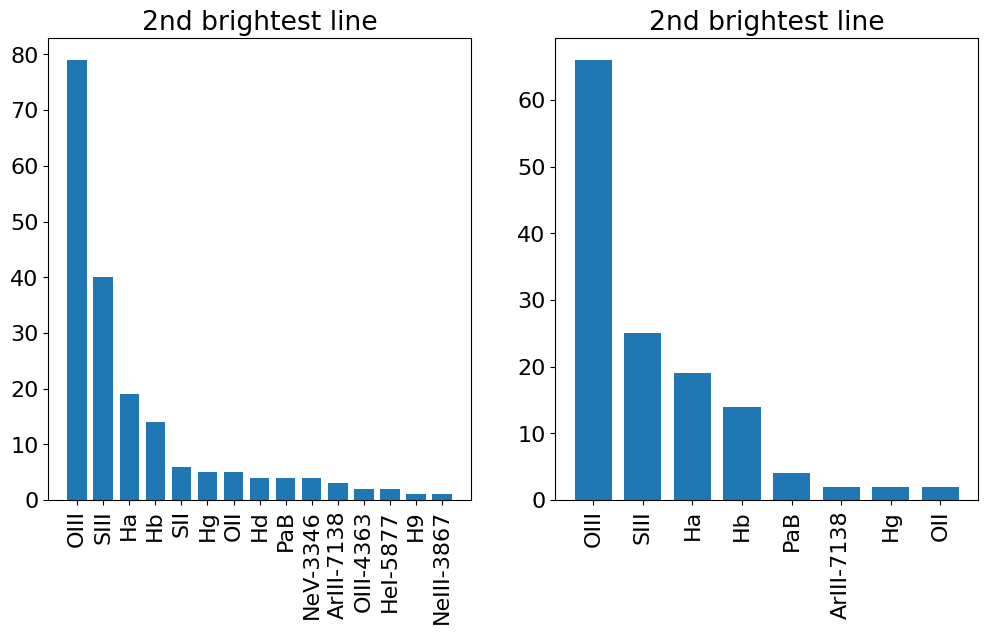

In [32]:
# Everything that it thinks has a line
#emline_bar_chart2(all_match_clean_tbl['LINE001'],all_match_clean_sn65_dz005_tbl['LINE001'], 
#                  title = "1st brightest line")

# Require 1 line (S/N > 6.5)
emline_bar_chart2(all_match_clean_sn65_tbl['LINE001'],all_match_clean_sn65_dz005_tbl['LINE001'], 
                  title = "1st brightest line")

# Require 2 lines (1st line S/N > 6.5 and a 2nd line S/N > 3.0)
emline_bar_chart2(all_match_clean_sn65_dz005_tbl['LINE001'],all_match_clean_sn65_sn3_dz005_tbl['LINE001'], 
                  title = "1st brightest line")
emline_bar_chart2(all_match_clean_sn65_dz005_tbl['LINE002'],all_match_clean_sn65_sn3_dz005_tbl['LINE002'], 
                  title = "2nd brightest line")

#emline_bar_chart(all_match_clean_tbl['LINE001'],title = "1st brightest line")
#emline_bar_chart(all_match_clean_tbl['LINE002'],title = "2nd brightest line")
#emline_bar_chart(all_match_clean_tbl['LINE003'],title = "3rd brightest line")
#emline_bar_chart(all_match_clean_tbl['LINE004'],title = "4th brightest line")
#emline_bar_chart(all_match_clean_tbl['LINE005'],title = "5th brightest line")

In [33]:
print("All sources")
print(len(all_match_tbl))
print()

print("Sources matched with a search radius <0.4")
#clean_filt
all_match_clean_tbl
print(len(all_match_clean_tbl))

#all_clean_not_filt = np.logical_not(all_clean_filt)
#all_match_clean_not_tbl = all_match_tbl[all_clean_not_filt]
#print(len(all_match_clean_not_tbl))
print()

print("Sources with line S/N > 6.5")
all_sn65_filt
all_match_clean_sn65_tbl
print(len(all_match_clean_sn65_tbl))

all_sn65_not_filt = np.logical_not(all_sn65_filt)
all_match_clean_sn65_not_tbl = all_match_clean_tbl[all_sn65_not_filt]
print(len(all_match_clean_sn65_not_tbl))
print()

print("Sources with line S/N > 6.5 within z < 0.005*(1+z)")
all_sn65_dz005_filt
all_match_clean_sn65_dz005_tbl
print(len(all_match_clean_sn65_dz005_tbl))

all_sn65_dz005_not_filt = np.logical_not(all_sn65_dz005_filt)
all_match_clean_sn65_dz005_not_tbl = all_match_clean_sn65_tbl[all_sn65_dz005_not_filt]
print(len(all_match_clean_sn65_dz005_not_tbl))

All sources
13260

Sources matched with a search radius <0.4
1927

Sources with line S/N > 6.5
355
1572

Sources with line S/N > 6.5 within z < 0.005*(1+z)
189
166


In [34]:
print(os.getcwd())

/Users/gwalth/data/Roman/grizli/sims/hlss/Extractions


In [ ]:
#all_match_tbl.write("match.fits")
#all_match_clean_tbl.write("match_clean.fits") # on the order of MB 

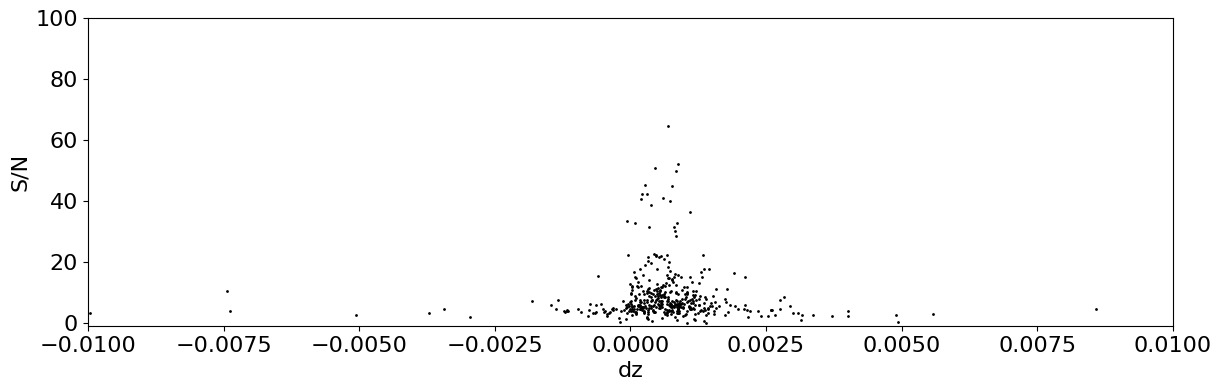

In [35]:
sn_dz_plot(all_match_clean_tbl)

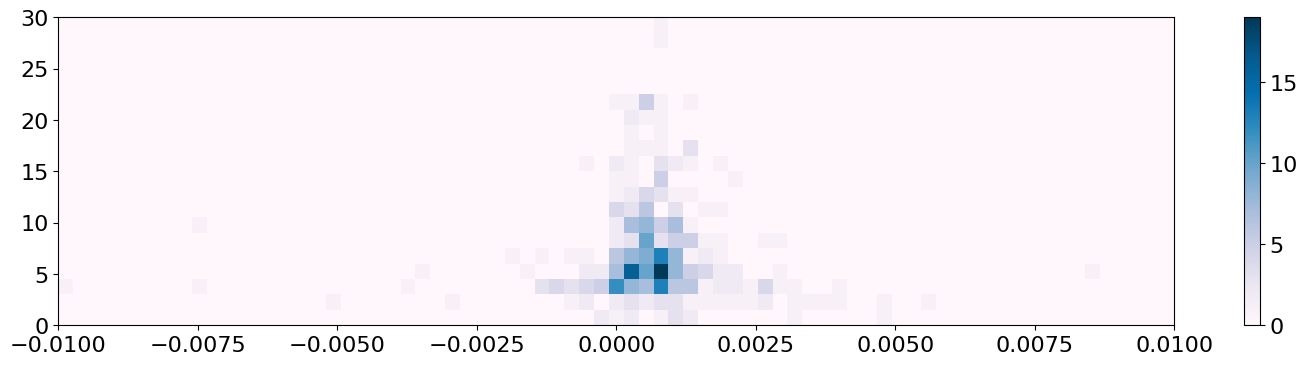

In [36]:
sn_dz_hist2d_plot(all_match_clean_tbl)

In [37]:
#print(all_match_clean_tbl['id'])
#print(all_match_clean_sn65_tbl['id'])
print(all_match_clean_sn65_dz005_tbl['id'])

 id 
----
   6
  40
  47
  49
  53
  55
  58
 ...
2230
2236
2251
2273
2281
2307
2312
Length = 189 rows


In [38]:
#print(all_match_clean_not_tbl['id'])
#print(all_match_clean_sn65_not_tbl['id'])
print(all_match_clean_sn65_dz005_not_tbl['id'])

 id 
----
   4
   4
  14
  22
  26
  31
  78
 ...
2130
2145
2148
2244
2283
2308
2311
Length = 166 rows


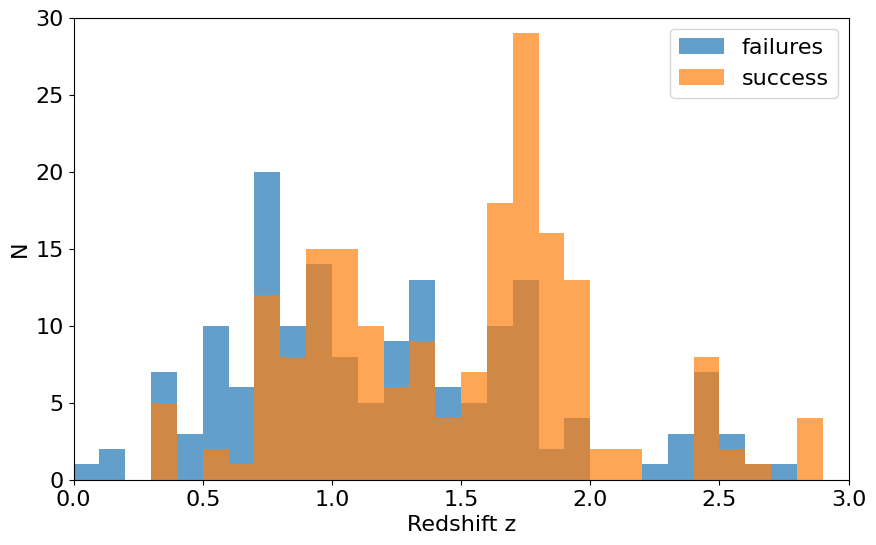

In [39]:
fig = plt.figure(figsize=(10,6))
p = fig.add_subplot(111)
#p.hist(all_match_clean_sn65_dz005_not_tbl['REDSHIFT_2'],
#       range=(0,3), bins=30, alpha=0.7, label="failures")
#p.hist(all_match_clean_sn65_dz005_tbl['REDSHIFT_2'],
#       range=(0,3), bins=30, alpha=0.7, label="matches")
p.hist(all_match_clean_sn65_dz005_not_tbl['z_true'],
       range=(0,3), bins=30, alpha=0.7, label="failures")
p.hist(all_match_clean_sn65_dz005_tbl['z_true'],
       range=(0,3), bins=30, alpha=0.7, label="success")
p.set_xlabel("Redshift z")
p.set_ylabel("N")
p.set_xlim(0,3)
p.set_ylim(0,30)
p.legend()

(0.0, 20.0)

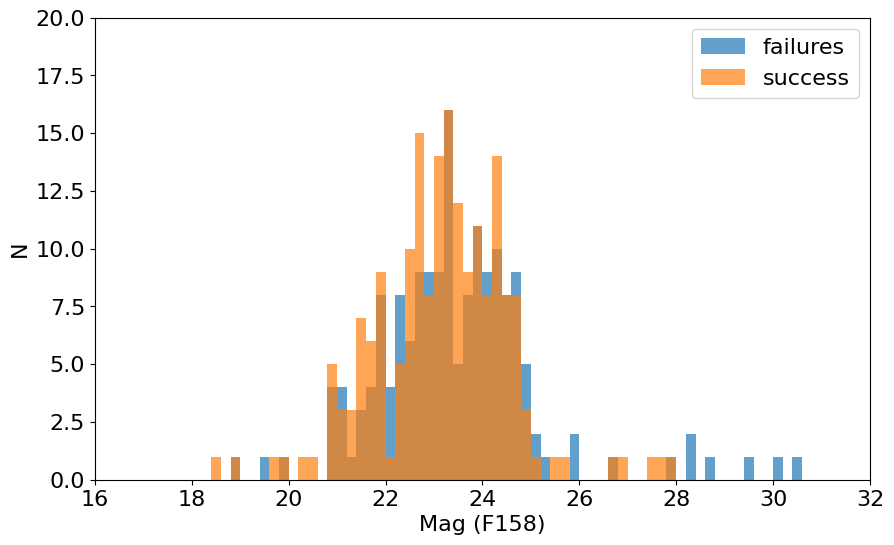

In [40]:
fig = plt.figure(figsize=(10,6))
p = fig.add_subplot(111)
#p.hist(all_match_clean_sn65_dz005_not_tbl['MAG_F1600W'],
#       range=(16,32), bins=16*5, alpha=0.7, label="failures")
#p.hist(all_match_clean_sn65_dz005_tbl['MAG_F1600W'],
#       range=(16,32), bins=16*5, alpha=0.7, label="matches")
p.hist(all_match_clean_sn65_dz005_not_tbl['m_new'],
       range=(16,32), bins=16*5, alpha=0.7, label="failures")
p.hist(all_match_clean_sn65_dz005_tbl['m_new'],
       range=(16,32), bins=16*5, alpha=0.7, label="success")
p.legend()
p.set_xlabel("Mag (F158)")
p.set_ylabel("N")
p.set_xlim(16,32)
p.set_ylim(0,20)

In [41]:
mag_cut = 24

print("All sources")
print(len(all_match_tbl))
filt = all_match_tbl['mag_auto'] < mag_cut
print("Sources m < %i" % (mag_cut))
print(len(all_match_tbl[filt]))
print()

print("Sources matched with a search radius <0.4")
#clean_filt
#all_match_clean_tbl
print(len(all_match_clean_tbl))
filt = all_match_clean_tbl['mag_auto'] < mag_cut
print("Sources m < %i" % (mag_cut))
print(len(all_match_clean_tbl[filt]))
print()

print("Sources with line S/N > 6.5")
print(len(all_match_clean_sn65_tbl))
filt = all_match_clean_sn65_tbl['mag_auto'] < mag_cut
print("Sources m < %i" % (mag_cut))
print(len(all_match_clean_sn65_tbl[filt]))
print()

#print(len(all_match_clean_sn65_not_tbl))
#filt = all_match_clean_sn65_not_tbl['MAG_AUTO'] < mag_cut
#print(len(all_match_clean_sn65_not_tbl[filt]))
#print()

print("Sources with line S/N > 6.5 within z < 0.005*(1+z)")
print(len(all_match_clean_sn65_dz005_tbl))
filt = all_match_clean_sn65_dz005_tbl['mag_auto'] < mag_cut
print("Sources m < %i" % (mag_cut))
print(len(all_match_clean_sn65_dz005_tbl[filt]))
print()

#print(len(all_match_clean_sn65_dz005_not_tbl))
#filt = all_match_clean_sn65_dz005_not_tbl['MAG_AUTO'] < mag_cut
#print(len(all_match_clean_sn65_dz005_not_tbl[filt]))
#print()

All sources
13260
Sources m < 24
8092

Sources matched with a search radius <0.4
1927
Sources m < 24
1177

Sources with line S/N > 6.5
355
Sources m < 24
269

Sources with line S/N > 6.5 within z < 0.005*(1+z)
189
Sources m < 24
145



In [42]:
print(os.getcwd())
os.chdir(os.path.join(LOCAL_PATH, root, 'Extractions'))
print(os.getcwd())

/Users/gwalth/data/Roman/grizli/sims/hlss/Extractions
/Users/gwalth/data/Roman/grizli/sims/hlss/Extractions


In [43]:
print(all_match_clean_sn65_dz005_tbl.colnames)

['id', 'thresh', 'npix', 'tnpix', 'xmin', 'xmax', 'ymin', 'ymax', 'x', 'y', 'x2_image', 'y2_image', 'xy_image', 'errx2', 'erry2', 'errxy', 'a_image', 'b_image', 'theta_image', 'cxx_image', 'cyy_image', 'cxy_image', 'cflux', 'flux', 'cpeak', 'peak', 'xcpeak', 'ycpeak', 'xpeak', 'ypeak', 'flag', 'x_image', 'y_image', 'number', 'ra', 'dec', 'x_world', 'y_world', 'flux_iso', 'fluxerr_iso', 'area_iso', 'mag_iso', 'kron_radius', 'kron_rcirc', 'flux_auto', 'fluxerr_auto', 'bkg_auto', 'flag_auto', 'area_auto', 'flux_radius_flag', 'flux_radius_20', 'flux_radius', 'flux_radius_90', 'tot_corr', 'mag_auto', 'magerr_auto', 'flux_aper_0', 'fluxerr_aper_0', 'flag_aper_0', 'bkg_aper_0', 'mask_aper_0', 'flux_aper_1', 'fluxerr_aper_1', 'flag_aper_1', 'bkg_aper_1', 'mask_aper_1', 'flux_aper_2', 'fluxerr_aper_2', 'flag_aper_2', 'bkg_aper_2', 'mask_aper_2', 'flux_aper_3', 'fluxerr_aper_3', 'flag_aper_3', 'bkg_aper_3', 'mask_aper_3', 'flux_aper_4', 'fluxerr_aper_4', 'flag_aper_4', 'bkg_aper_4', 'mask_aper_4

In [44]:
tbl = all_match_clean_sn65_dz005_tbl

filt = (tbl["REDSHIFT"] > 2.1) & (tbl["REDSHIFT"] < 2.3)

for col in ['z_true','mag_auto',"REDSHIFT","SN001","SN002"]:
    tbl[col].info.format = '.3f'
    
print(tbl['id','z_true','mag_auto',"REDSHIFT","LINE001","SN001","LINE002","SN002"][filt])

 id  z_true mag_auto REDSHIFT LINE001 SN001  LINE002  SN002
              uJy                                          
---- ------ -------- -------- ------- ------ -------- -----
 479  2.156   23.889    2.155    OIII 12.822 NeV-3346 2.787
1953  2.199   24.111    2.197    OIII  6.990       Hg 2.008


In [45]:
tbl = all_match_clean_sn65_dz005_tbl

filt = (tbl["REDSHIFT"] > 1.0) & (tbl["REDSHIFT"] < 2.0)

for col in ['z_true','mag_auto',"REDSHIFT","SN001","SN002"]:
    tbl[col].info.format = '.3f'
    
print(tbl['id','z_true','mag_auto',"REDSHIFT","LINE001","SN001","LINE002","SN002"][filt])

 id  z_true mag_auto REDSHIFT LINE001 SN001   LINE002   SN002 
              uJy                                             
---- ------ -------- -------- ------- ------ ---------- ------
   6  1.118   22.221    1.114      Ha 16.169       OIII  2.490
  47  1.078   22.630    1.075      Ha 12.991       OIII  3.171
  49  1.070   22.039    1.068      Ha  7.666       OIII  2.388
  55  1.901   23.937    1.898      Ha  7.894       OIII  2.524
  58  1.729   22.699    1.729      Ha  7.186  OIII-4363  1.151
  60  1.142   23.439    1.140      Ha  7.204        SII  1.054
 ...    ...      ...      ...     ...    ...        ...    ...
2155  1.808   23.133    1.809      Ha 15.400       OIII  5.209
2201  1.387   21.843    1.386      Ha 38.746       OIII 13.517
2203  1.817   24.562    1.817      Ha  7.583       OIII  5.685
2213  1.733   23.619    1.732      Ha  9.940       OIII  5.128
2220  1.238   22.288    1.236      Ha  9.871 ArIII-7138  1.393
2230  1.739   24.510    1.738      Ha 11.456        SII

In [46]:
# 1.0 < z < 2.0
####################################################
# In this case:
# - detects [OIII] in all roll angles
# - redshift range misses Ha, [OII] is weak
#   - maybe target 2nd [OIII] line, is it in the line list
# - 4 roll angles available

id = 2201
tbl = all_match_clean_tbl
filt = tbl['id'] == id
print(tbl['z_true','mag_auto',"REDSHIFT",'m_new','d2d'][filt])
print(tbl['d2d'][filt].to(u.arcsec))
print(tbl["LINE001","SN001","LINE002","SN002",][filt])
z_in = tbl["z_true"][filt][0]


#display_grizli("my_roman_sims", id, w0=0.95, w1=2.0)
display_grizli("hlss", id, w0=0.95, w1=2.0, y0=-3e-18, y1=2e-17, z_in=z_in, lw=0.5)

      z_true           mag_auto      ...          d2d         
                         uJy         ...          deg         
----------------- ------------------ ... ---------------------
1.386592015715456 21.843225560829126 ... 4.290394028383145e-05
[0.15445419] arcsec
LINE001      SN001       LINE002       SN002      
------- ---------------- ------- -----------------
     Ha 38.7458679473058    OIII 13.51671075472989


FileNotFoundError: [Errno 2] No such file or directory: 'hlss_02201.full.fits'

      z_true            mag_auto     ...     m_new               d2d          
                          uJy        ...                         deg          
------------------ ----------------- ... -------------- ----------------------
2.1563036045031043 23.88907441183399 ... 23.96286026551 4.1354704539441596e-05
[0.14887694] arcsec
LINE001       SN001        LINE002        SN002      
------- ------------------ -------- -----------------
   OIII 12.822111655388923 NeV-3346 2.787097170083879

F158
Filename: hlss_00479.1D.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1  GR            1 BinTableHDU     41   947R x 8C   [D, D, D, K, D, D, D, D]   
None
['wave', 'flux', 'err', 'npix', 'flat', 'contam', 'line', 'cont']


2023-02-21 01:05:13,603 - stpipe - WARNING - /home/gwalth/python.linux/dev/grizli_analysis.py:204: RuntimeWarning: invalid value encountered in divide
  p4.errorbar(grism['wave']/1e4, grism['flux']/grism['flat'], yerr=grism["err"]/grism['flat'],

2023-02-21 01:05:13,644 - stpipe - WARNING - /home/gwalth/python.linux/dev/grizli_analysis.py:207: RuntimeWarning: invalid value encountered in divide
  p4.plot(grism['wave']/1e4, grism['line']/grism['flat'], color="r", alpha=0.5)

2023-02-21 01:05:13,647 - stpipe - WARNING - /home/gwalth/python.linux/dev/grizli_analysis.py:209: RuntimeWarning: invalid value encountered in divide
  p4.plot(grism['wave']/1e4, grism['contam']/grism['flat'], color="b", alpha=0.5)



1
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  ID      =                  479 / Object ID                                      RA      =    9.142070864795331 / Right ascension                                DEC     =   -0.847178966920117 / Declination                                    ISFLAM  =                    F / Pixels in f-lam units                          FCONTAM =                  0.2 / Contamination parameter                        NGRISM  =                    1 / Number of grisms                               GRISM001= 'GR      '           / Grism name                                     NGR     =                    4 / Number of PAs for grism GR                     GR01    =                 95.0 / PA   

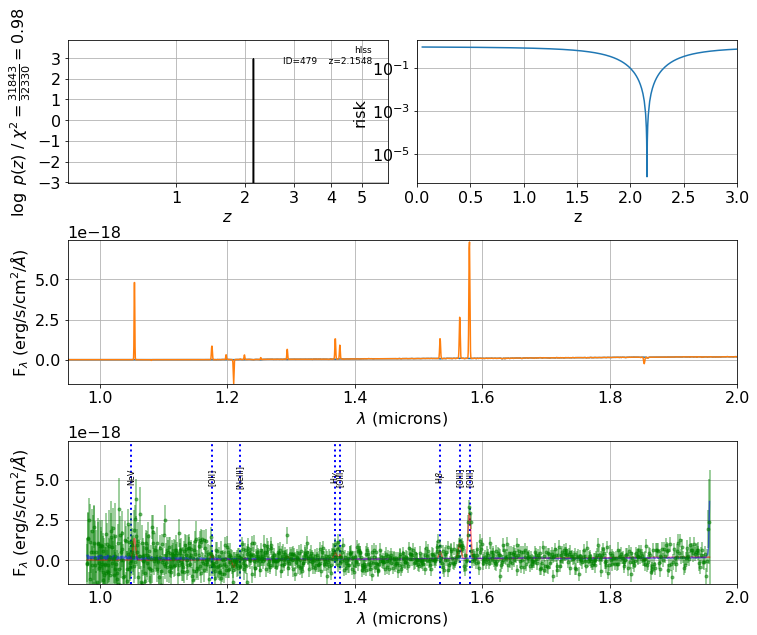

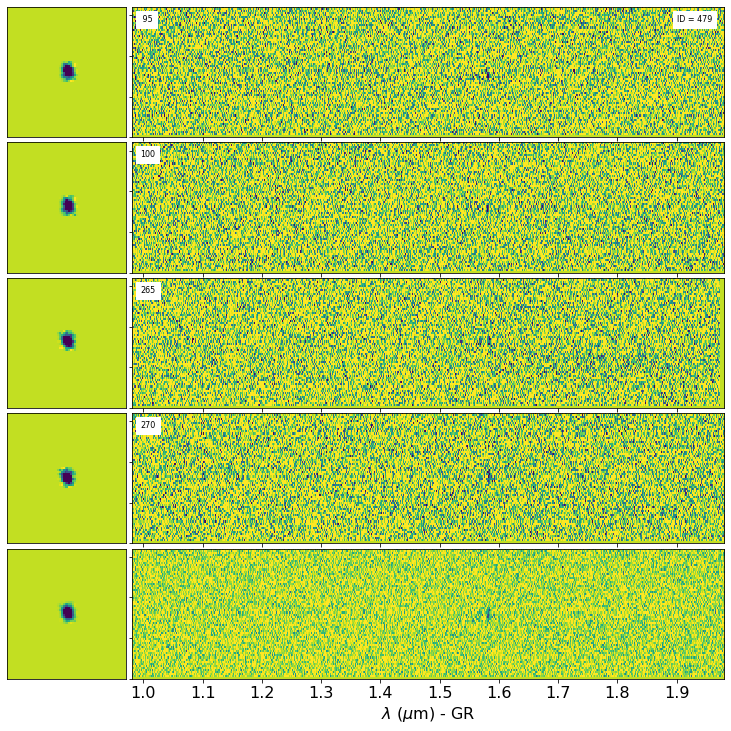

In [49]:
# 2.1 < z < 2.3
####################################################
# In this case:
# - detects [OIII] in all roll angles
# - redshift range misses Ha, [OII] is weak
#   - maybe target 2nd [OIII] line, is it in the line list
# - 4 roll angles available

id = 479
tbl = all_match_clean_tbl
filt = tbl['id'] == id
print(tbl['z_true','mag_auto',"REDSHIFT",'m_new','d2d'][filt])
print(tbl['d2d'][filt].to(u.arcsec))
print(tbl["LINE001","SN001","LINE002","SN002",][filt])
z_in = tbl["z_true"][filt][0]


#display_grizli("my_roman_sims", id, w0=0.95, w1=2.0)
display_grizli("hlss", id, w0=0.95, w1=2.0, z_in=z_in)

In [50]:
tbl = all_match_clean_sn65_dz005_tbl

#filt = tbl["LINE001"] == "Ha"     # 1
#filt = tbl["LINE001"] == "OIII"   # 2
#filt = tbl["LINE001"] == "SIII"   # 3
filt = tbl["LINE001"] == "OII"    # 4
#filt = tbl["LINE001"] == "PaB"    # 5

for col in ['z_true','mag_auto',"REDSHIFT","SN001","SN002"]:
    tbl[col].info.format = '.3f'

print(tbl['id','z_true','mag_auto',"REDSHIFT","LINE001","SN001","LINE002","SN002"][filt])

 id  z_true mag_auto REDSHIFT LINE001 SN001   LINE002   SN002
              uJy                                            
---- ------ -------- -------- ------- ------ ---------- -----
1004  1.731   24.507    1.751     OII 10.447 NeIII-3867 1.633


      z_true            mag_auto      ...          d2d         
                          uJy         ...          deg         
------------------ ------------------ ... ---------------------
1.7311331399691396 24.506765156787335 ... 4.633159051754552e-05
[0.16679373] arcsec
LINE001       SN001         LINE002         SN002       
------- ------------------ ---------- ------------------
    OII 10.446966588418718 NeIII-3867 1.6329751410142366

F158
Filename: hlss_01004.1D.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1  GR            1 BinTableHDU     41   947R x 8C   [D, D, D, K, D, D, D, D]   
None
['wave', 'flux', 'err', 'npix', 'flat', 'contam', 'line', 'cont']
1
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  = 

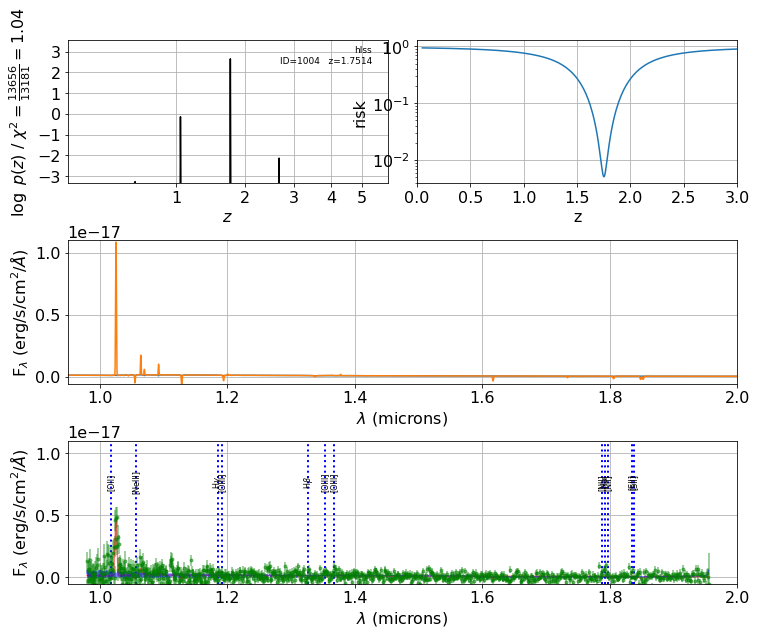

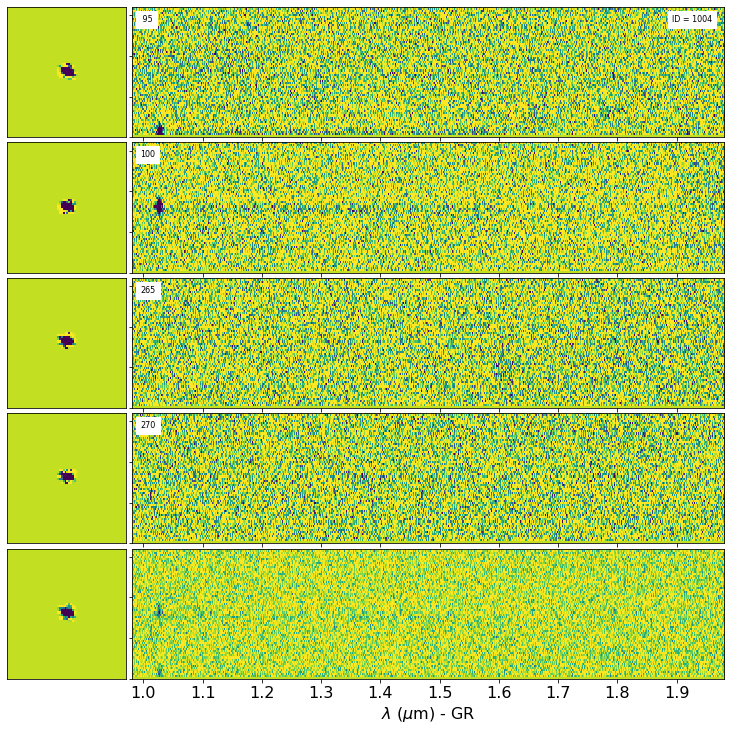

In [51]:
# [OII]
####################################################
# In this case:
# - 4 roll angles available
# - Single line detected (unclear which source)
#
# --> Clearly a misidentification
# --> Lucky redshift!!! (How many of these exist?!)
####################################################
# We want to look at the individual extractions!!! #
####################################################

id = 1004
tbl = all_match_clean_tbl
filt = tbl['id'] == id
print(tbl['z_true','mag_auto',"REDSHIFT",'m_new','d2d'][filt])
print(tbl['d2d'][filt].to(u.arcsec))
print(tbl["LINE001","SN001","LINE002","SN002",][filt])
z_in = tbl["z_true"][filt][0]


#display_grizli("my_roman_sims", id, w0=0.95, w1=2.0)
display_grizli("hlss", id, w0=0.95, w1=2.0, z_in=z_in)

       z_true            mag_auto      ...          d2d         
                           uJy         ...          deg         
------------------- ------------------ ... ---------------------
0.39845230442180324 18.902283171654915 ... 4.267079227252022e-05
[0.15361485] arcsec
LINE001       SN001       LINE002        SN002       
------- ----------------- ------- -------------------
    PaB 8.282430645686487    SIII 0.26694785166003787

F158
Filename: hlss_00888.1D.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1  GR            1 BinTableHDU     41   947R x 8C   [D, D, D, K, D, D, D, D]   
None
['wave', 'flux', 'err', 'npix', 'flat', 'contam', 'line', 'cont']
1
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =      

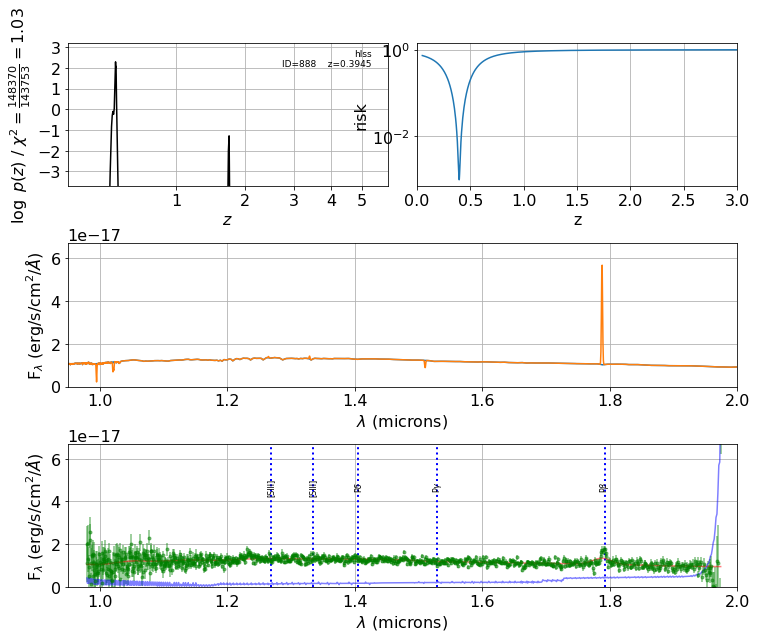

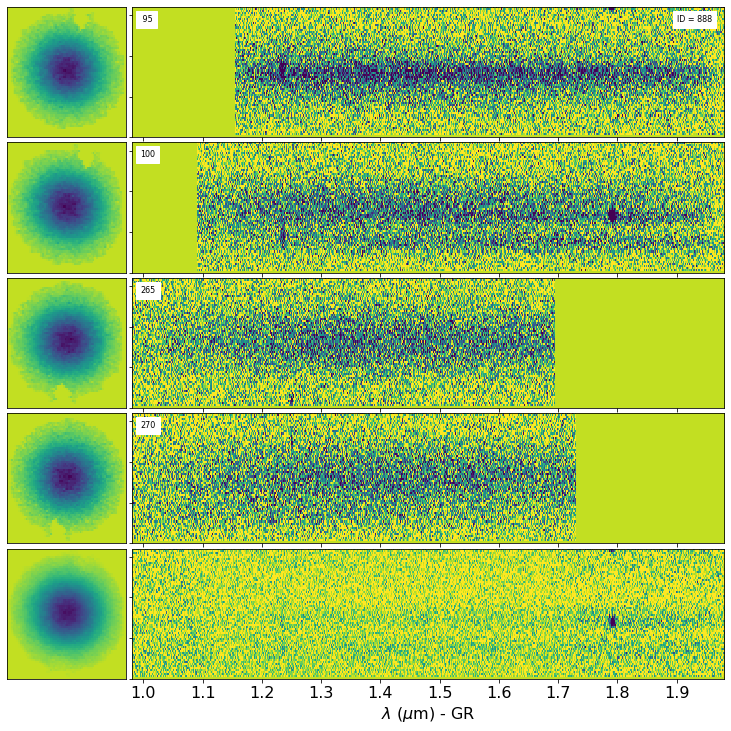

In [52]:
# PaB
####################################################
# In this case:
# - contaminated source
# - 4 roll angles available (wavelength coverage not complete)
# - Multiple lines detected (unclear which source)
#
# --> Clearly a misidentification
# --> Lucky redshift!!! (How many of these exist?!)
####################################################
# We want to look at the individual extractions!!! #
####################################################



id = 888
tbl = all_match_clean_tbl
filt = tbl['id'] == id
print(tbl['z_true','mag_auto',"REDSHIFT",'m_new','d2d'][filt])
print(tbl['d2d'][filt].to(u.arcsec))
print(tbl["LINE001","SN001","LINE002","SN002",][filt])
z_in = tbl["z_true"][filt][0]


#display_grizli("my_roman_sims", id, w0=0.95, w1=2.0)
display_grizli("hlss", id, w0=0.95, w1=2.0, z_in=z_in)

      z_true            mag_auto      ...          d2d         
                          uJy         ...          deg         
------------------ ------------------ ... ---------------------
0.3574042416195711 19.708640087247975 ... 4.248900678998153e-05
[0.15296042] arcsec
LINE001       SN001       LINE002       SN002      
------- ----------------- ------- -----------------
   SIII 22.47923108577715     PaB 8.131212076270627

F158
Filename: hlss_00457.1D.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1  GR            1 BinTableHDU     41   947R x 8C   [D, D, D, K, D, D, D, D]   
None
['wave', 'flux', 'err', 'npix', 'flat', 'contam', 'line', 'cont']
1
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                

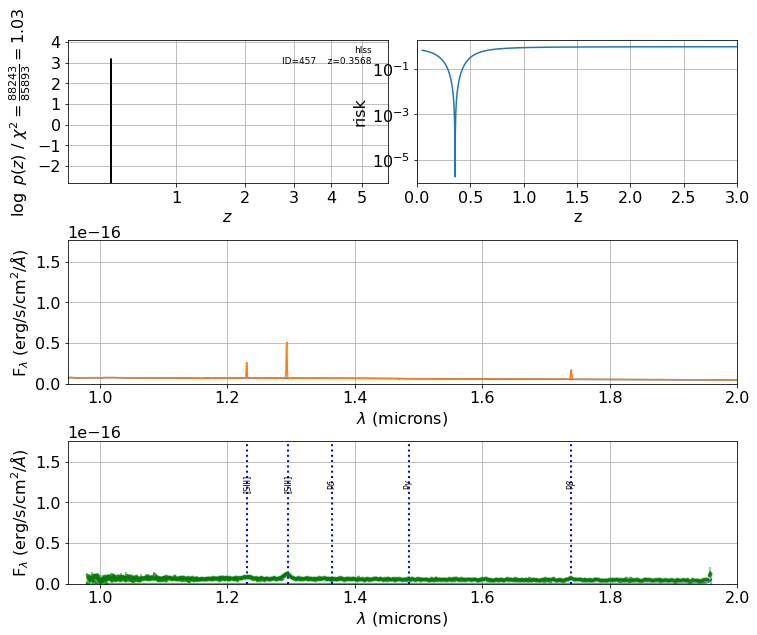

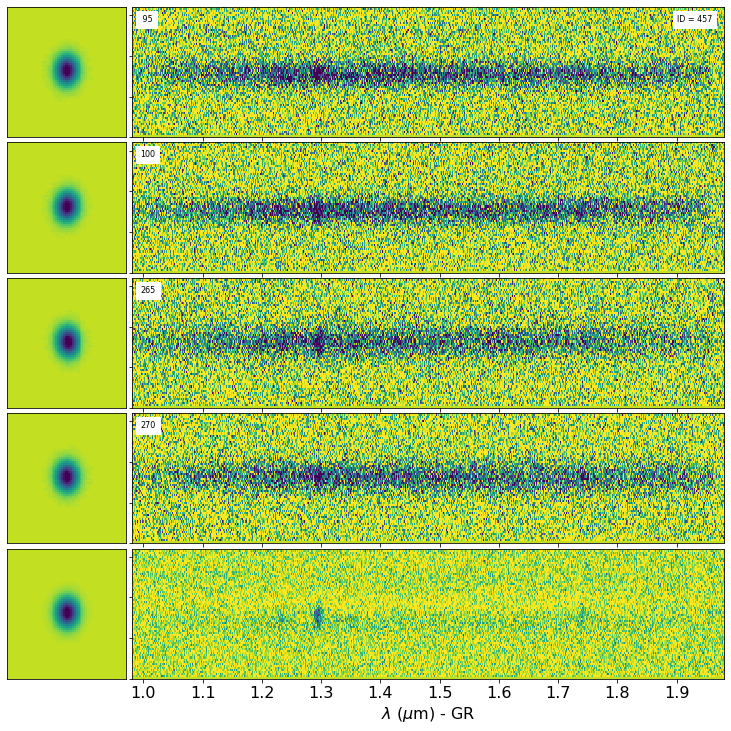

In [53]:
# [SIII]
#############################################
# In this case:
# - PaB detection
# - other nearby line at 9700? P5?
#############################################

id = 457
tbl = all_match_clean_tbl
filt = tbl['id'] == id
print(tbl['z_true','mag_auto',"REDSHIFT",'m_new','d2d'][filt])
print(tbl['d2d'][filt].to(u.arcsec))
print(tbl["LINE001","SN001","LINE002","SN002",][filt])
z_in = tbl["z_true"][filt][0]


#display_grizli("my_roman_sims", id, w0=0.95, w1=2.0)
display_grizli("hlss", id, w0=0.95, w1=2.0, z_in=z_in)

      z_true            mag_auto      ...          d2d          
                          uJy         ...          deg          
------------------ ------------------ ... ----------------------
0.7470093346069447 23.989534898873487 ... 4.2865791739233816e-05
0.8851056172941977 23.989534898873487 ...  4.475615240955337e-05
[0.15431685 0.16112215] arcsec
LINE001       SN001        LINE002       SN002       
------- ------------------ ------- ------------------
     Ha 12.557555080150593    OIII 0.8361751084832455
     Ha 12.557555080150593    OIII 0.8361751084832455

F158
Filename: hlss_00004.1D.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1  GR            1 BinTableHDU     40   947R x 8C   [D, D, D, K, D, D, D, D]   
None
['wave', 'flux', 'err', 'npix', 'flat', 'contam', 'line', 'cont']
1
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data t

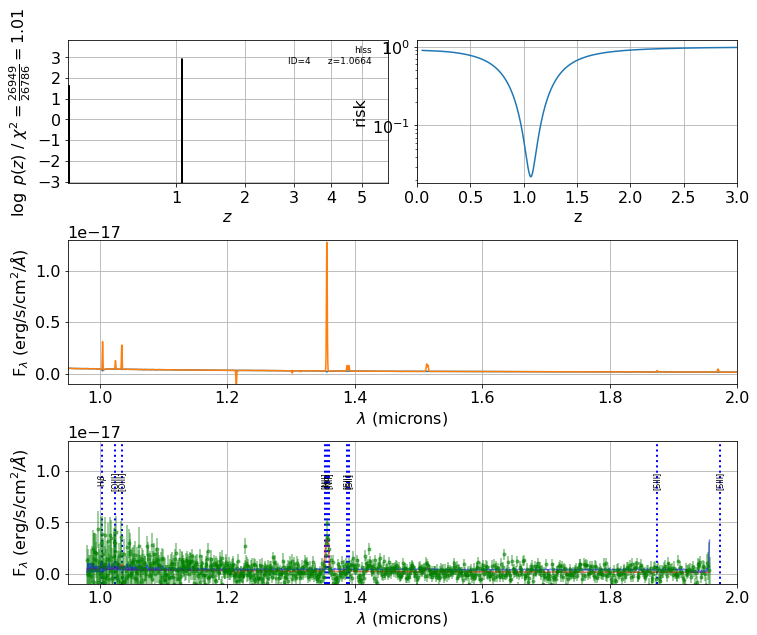

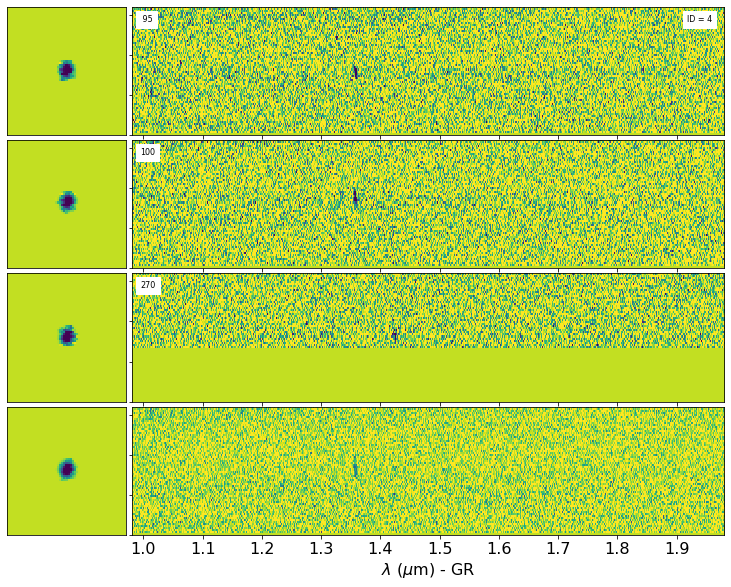

In [54]:
#############################################
# In this case:
# - 3 roll angles available
# - Single line detected (two roll angles)
# - Line appears to move (3rd roll angle)
#
# --> Clearly a misidentification
####################################################
# We want to look at the individual extractions!!! #
####################################################

id = 4
tbl = all_match_clean_tbl
filt = tbl['id'] == id
print(tbl['z_true','mag_auto',"REDSHIFT",'m_new','d2d'][filt])
print(tbl['d2d'][filt].to(u.arcsec))
print(tbl["LINE001","SN001","LINE002","SN002",][filt])
z_in = tbl["z_true"][filt][0]
z_in = 1.0663

#display_grizli("my_roman_sims", id, w0=0.95, w1=2.0)
display_grizli("hlss", id, w0=0.95, w1=2.0, z_in=z_in)

In [ ]:
print(dir())
#print(__dict__)

In [59]:
from grizli import multifit
import glob
grp = multifit.GroupFLT(grism_files=glob.glob('*GrismFLT.fits'),                 
                                    catalog='{0}-ir.cat.fits'.format(prefix),                
                                    cpu_count=-1, sci_extn=1, pad=800)

Load hlss-175.0-gr.01.GrismFLT.fits!


2023-02-21 01:16:01,765 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59801.000000 from DATE-OBS'.
  warnings.warn(

2023-02-21 01:16:01,776 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59801.000000 from DATE-OBS'.
  warnings.warn(





Load hlss-000.0-gr.01.GrismFLT.fits!


2023-02-21 01:16:14,811 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59801.000000 from DATE-OBS'.
  warnings.warn(

2023-02-21 01:16:14,818 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59801.000000 from DATE-OBS'.
  warnings.warn(



Load hlss-005.0-gr.01.GrismFLT.fits!


2023-02-21 01:16:30,387 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59801.000000 from DATE-OBS'.
  warnings.warn(

2023-02-21 01:16:30,394 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59801.000000 from DATE-OBS'.
  warnings.warn(



Load hlss-170.0-gr.01.GrismFLT.fits!


2023-02-21 01:16:44,818 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59801.000000 from DATE-OBS'.
  warnings.warn(

2023-02-21 01:16:44,826 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59801.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 59.88 sec.


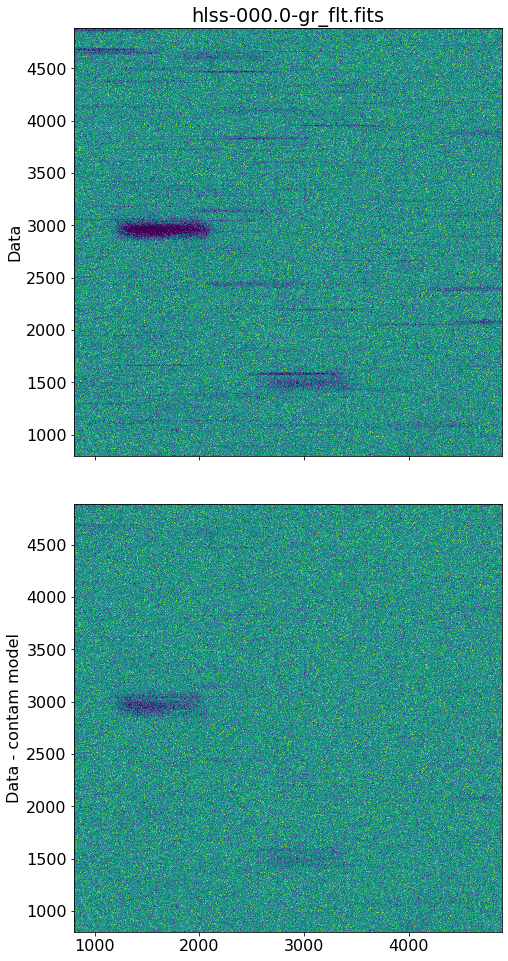

In [74]:
# Show the results of the contamination model
### Show FLT residuals
cmap = 'viridis_r'
vm = [-0.2, 0.2]


fig = plt.figure(figsize=[7,14])
ax = fig.add_subplot(211)
flt = grp.FLTs[1] # G102

ax.imshow(flt.grism['SCI'], vmin=vm[0], vmax=vm[1], cmap=cmap,
          interpolation='Nearest', origin='lower')
#ax.set_title('{0}, {1}'.format(flt.grism.filter, flt.grism.parent_file))
ax.set_title('{0}'.format(flt.grism.parent_file))
ax.set_xticklabels([])
ax.set_ylabel('Data')

ax = fig.add_subplot(212)
ax.imshow(flt.grism['SCI'] - flt.model, vmin=vm[0], vmax=vm[1], cmap=cmap,
          interpolation='Nearest', origin='lower')

ax.set_ylabel('Data - contam model')

for ax in fig.axes:
    ax.set_xlim(800,4888); ax.set_ylim(800,4888)

fig.tight_layout(pad=1)

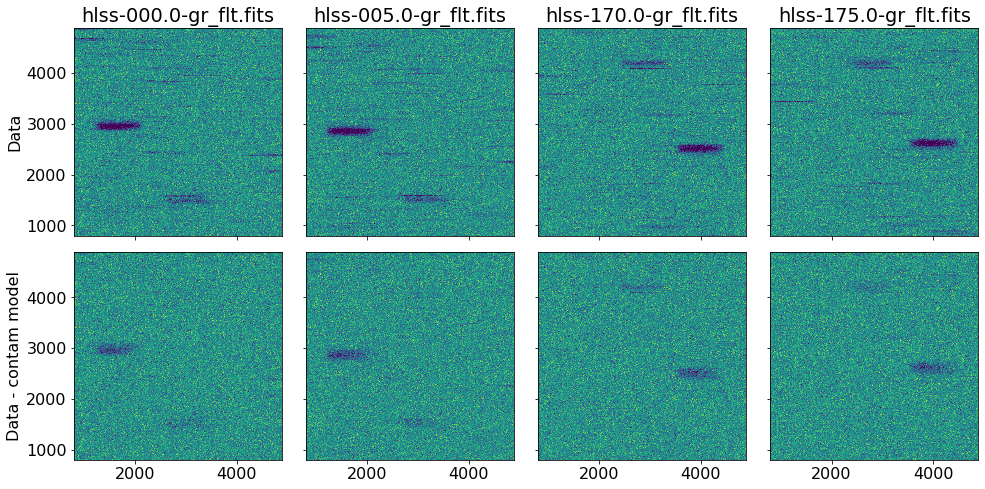

In [72]:
# Show the results of the contamination model
### Show FLT residuals
cmap = 'viridis_r'
vm = [-0.2, 0.2]


fig = plt.figure(figsize=[14,7])
ax = fig.add_subplot(241)
flt = grp.FLTs[1] # G102

ax.imshow(flt.grism['SCI'], vmin=vm[0], vmax=vm[1], cmap=cmap,
          interpolation='Nearest', origin='lower')
#ax.set_title('{0}, {1}'.format(flt.grism.filter, flt.grism.parent_file))
ax.set_title('{0}'.format(flt.grism.parent_file))
ax.set_xticklabels([])
ax.set_ylabel('Data')

ax = fig.add_subplot(245)
ax.imshow(flt.grism['SCI'] - flt.model, vmin=vm[0], vmax=vm[1], cmap=cmap,
          interpolation='Nearest', origin='lower')

ax.set_ylabel('Data - contam model')



ax = fig.add_subplot(242)
flt = grp.FLTs[2] # G141

ax.imshow(flt.grism['SCI'], vmin=vm[0], vmax=vm[1], cmap=cmap,
          interpolation='Nearest', origin='lower')
#ax.set_title('{0}, {1}'.format(flt.grism.filter, flt.grism.parent_file))
ax.set_title('{0}'.format(flt.grism.parent_file))
ax.set_xticklabels([]); ax.set_yticklabels([])

ax = fig.add_subplot(246)
ax.imshow(flt.grism['SCI'] - flt.model, vmin=vm[0], vmax=vm[1], cmap=cmap,
          interpolation='Nearest', origin='lower')

ax.set_yticklabels([])


ax = fig.add_subplot(243)
flt = grp.FLTs[3] # G141

ax.imshow(flt.grism['SCI'], vmin=vm[0], vmax=vm[1], cmap=cmap,
          interpolation='Nearest', origin='lower')
#ax.set_title('{0}, {1}'.format(flt.grism.filter, flt.grism.parent_file))
ax.set_title('{0}'.format(flt.grism.parent_file))
ax.set_xticklabels([]); ax.set_yticklabels([])

ax = fig.add_subplot(247)
ax.imshow(flt.grism['SCI'] - flt.model, vmin=vm[0], vmax=vm[1], cmap=cmap,
          interpolation='Nearest', origin='lower')

ax.set_yticklabels([])



ax = fig.add_subplot(244)
flt = grp.FLTs[0] # G141

ax.imshow(flt.grism['SCI'], vmin=vm[0], vmax=vm[1], cmap=cmap,
          interpolation='Nearest', origin='lower')
#ax.set_title('{0}, {1}'.format(flt.grism.filter, flt.grism.parent_file))
ax.set_title('{0}'.format(flt.grism.parent_file))
ax.set_xticklabels([]); ax.set_yticklabels([])

ax = fig.add_subplot(248)
ax.imshow(flt.grism['SCI'] - flt.model, vmin=vm[0], vmax=vm[1], cmap=cmap,
          interpolation='Nearest', origin='lower')

ax.set_yticklabels([])

for ax in fig.axes:
    ax.set_xlim(800,4888); ax.set_ylim(800,4888)

fig.tight_layout(pad=1)